### Problem statement
- Food delivery services like zomato and swiggy need to show the accurate time the food will take to delivery your order to keep transparency with their customers. These companies use ML algorism to predict the food delivery time based on how much time the delivery partners took for the same distance in the past.


- To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of delivery. After finding the distance between the restaurant and the delivery location, we need to find the relationships between the time taken by delivery partners to deliver the food in the past for the same distance. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
from math import radians, sin, cos, sqrt, atan2
import folium #folium using for display world map


In [3]:
df = pd.read_csv("Notebook/Data/food_delivery_dataset.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [5]:
df.shape

(45584, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

### Observation
1. Dataset has 45K rows and 19 columns.
2. Memory consumption around 7 MB
3. There are 9 numerical columns and 11 are object type columns.
4. Target column: Time_taken (min)

In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


### EDA and FE
#### operations that we are going to perform

1. handling missing and finding the % of missing values column wise
2. finding unique values of each column
3. converting Order_Date column into to_datetime dtypes and dividing year, month and day columns into their respectively columns.
4. converting Time_Orderd into to_daatetime dtypes and dividing hours and mins columns and similarly applying this same method as in Time_Order_picked columns
5. segregating Time_Category columns into dinner, breakfast, lunch, evening snacks and after lunch categories.
6. removing NAN values from various columns.
7. visualizing independent and dependent features through various graphs.
8. finding out distance btw various restaurant locations and destination locations.
9. deleting unnecessary features to perform model training w.r.t various regression models 

In [9]:
features = []
dtypes = []
count = []
unique= []
missing_value = []
missing_value_percentage = []

for column in df.columns:
    features.append(column)
    count.append(len(df[column]))
    dtypes.append(df[column].dtypes)
    unique.append(df[column].nunique())
    missing_value.append(df[column].isnull().sum())
    missing_value_percentage.append((df[column].isnull().sum()/df.shape[0])*100)

dataframe = pd.DataFrame({
    'features':features,
    'dtypes':dtypes,
    'count':count,
    'nunique':unique,
    'missing_value':missing_value,
    'missing_value_percentage':missing_value_percentage

})    

dataframe.set_index('features')

,dtypes,count,nunique,missing_value,missing_value_percentage
features,,,,,
ID,object,45584,45584,0,0.000000
Delivery_person_ID,object,45584,1320,0,0.000000
Delivery_person_Age,float64,45584,22,1854,4.067217
Delivery_person_Ratings,float64,45584,28,1908,4.185679
Restaurant_latitude,float64,45584,657,0,0.000000
Restaurant_longitude,float64,45584,518,0,0.000000
Delivery_location_latitude,float64,45584,4373,0,0.000000
Delivery_location_longitude,float64,45584,4373,0,0.000000
Order_Date,object,45584,44,0,0.000000


In [10]:
# dropping age and ID columns because these columns are not that imp for analysiation.

df.drop(columns=['ID'], axis =1, inplace=True)

In [11]:
## changing the Order_Date column into datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

df['Order_Date'] 

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [12]:
df['year'] = df["Order_Date"].dt.year
df['month'] = df["Order_Date"].dt.month
df['day'] = df["Order_Date"].dt.day

In [13]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [14]:
df.drop(columns=['Order_Date'], axis =1, inplace=True)

In [15]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [16]:
df.dropna(subset=['Time_Orderd'], inplace=True) #dropna method removes the rows that contains NULL values

In [17]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')
df['Time_Orderd'].sample(10)

35865          17:50
45133          21:45
38101          19:10
22842          21:15
1257           18:15
9016           08:45
39299          23:35
44037          0:375
29457    0:666666667
3894           21:40
Name: Time_Orderd, dtype: object

In [18]:
#define a lambda function with error handling 

def extract_time(x):
    try:
        return x.split(":")[0] + ":" + x.split(":")[1][:2]
    except IndexError:
        return "00:00"
    
#apply the lambda function to the Time_Orderd Column
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [19]:
#convert the Order_time column to a time data type
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format="%H:%M:%S", errors='ignore')

In [20]:
df['Time_Orderd_Hour'] = df['Time_Orderd'].str.split(":", expand=True)[0]

#replacing "0" with "00" both indicate 24th hr
df['Time_Orderd_Hour']= df['Time_Orderd_Hour'].replace("0","00")

#changing the data type
df['Time_Orderd_Hour']=df['Time_Orderd_Hour'].astype('int32')

In [21]:
#order minute 
df['Time_Orderd_min'] = df['Time_Orderd'].str.split(':', expand=True)[1]

#changing the data type
df['Time_Orderd_min']= df['Time_Orderd_min'].astype('int32')

In [22]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,Time_Orderd_Hour,Time_Orderd_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [23]:
# in time order hour columns we are distributing the data as follows: -

# 7-12 Breakfast
#12-15 Lunch
#15-17 after lunch
#17-19 evening snacks
#19-00 - Dinner

def categorize_time_order(hour):
    if 7 <= hour <= 12:
        return 'Breakfast'
    elif 12 < hour <= 15:
        return 'Lunch'
    elif 15 < hour <= 17:
        return 'After Lunch'
    elif 17 < hour <= 19:
        return 'Evening Snacks'
    else:
        return 'Dinner'
    

df['Time_Category'] = df['Time_Orderd_Hour'].apply(categorize_time_order)    

df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,Time_Orderd_Hour,Time_Orderd_min,Time_Category
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,3.0,No,Metropolitian,46,2022,2,12,21,55,Dinner
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,1.0,No,Metropolitian,23,2022,2,13,14,55,Lunch
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,1.0,No,Metropolitian,21,2022,3,4,17,30,After Lunch
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,0.0,No,Metropolitian,20,2022,2,13,9,20,Breakfast
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,1.0,No,Metropolitian,41,2022,2,14,19,50,Evening Snacks


In [24]:
#time order picked

df['Time_Order_picked'] = df['Time_Order_picked'].str.replace(".","." )

In [25]:
#define a lambda function with error handling 
def extract_time(x):
    try:
        return x.split(":")[0]+":"+x.split(":")[1][:2]
    except IndexError:
        return '00:00'

#applying the lambda function to the Order_Time column
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [26]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format="%H:%M:%S", errors='ignore')

In [27]:
df['Time_Order_picked_Hour'] = df['Time_Order_picked'].str.split(":",expand=True)[0]

#changing the data type
df['Time_Order_picked_min_Hour'] = df['Time_Order_picked_Hour'].astype('int32')

In [28]:
df['Time_Order_picked_min'] = df['Time_Order_picked'].str.split(":", expand=True)[1]

df['Time_Order_picked_min'] = df['Time_Order_picked_min'].astype('int32')

In [29]:
#extracting city from delivery_person_id

#splitting the delivery_person_id on the bases of "RES", this will give us the city name of delivery

df['Delivery_city'] = df['Delivery_person_ID'].str.split('RES', expand=True)[0]

In [30]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,year,month,day,Time_Orderd_Hour,Time_Orderd_min,Time_Category,Time_Order_picked_Hour,Time_Order_picked_min_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,2022,2,12,21,55,Dinner,22,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,2022,2,13,14,55,Lunch,15,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,2022,3,4,17,30,After Lunch,17,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,2022,2,13,9,20,Breakfast,09,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,2022,2,14,19,50,Evening Snacks,20,20,5,KNP


In [31]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [32]:
df['Delivery_city'].nunique()

22

In [33]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'Time_Orderd_Hour',
       'Time_Orderd_min', 'Time_Category', 'Time_Order_picked_Hour',
       'Time_Order_picked_min_Hour', 'Time_Order_picked_min', 'Delivery_city'],
      dtype='object')

In [34]:
df.shape

(43853, 28)

In [35]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [36]:
#filling the null value with the mean of that person ID

rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [37]:
df['Delivery_person_Ratings'].isnull().sum()

0

In [38]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [39]:
df['Road_traffic_density'].unique()



array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [40]:
df['Vehicle_condition'].unique()

array([2, 1, 0])

In [41]:
df['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [42]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter'], dtype=object)

In [43]:
df['multiple_deliveries'].unique()


array([ 3.,  1.,  0., nan,  2.])

In [44]:
# Find the most frequent value in the 'multiple_deliveries' column
most_frequent_value = df['multiple_deliveries'].mode().iloc[0]

# Replace NaN values with the most frequent value
df['multiple_deliveries'].fillna(most_frequent_value, inplace=True)

In [45]:
df['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
most_frequent_value = df['Festival'].mode().iloc[0]

# Replace NaN values with the most frequent value
df['Festival'].fillna(most_frequent_value, inplace=True)

In [47]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [48]:
most_frequent_value = df['City'].mode().iloc[0]

# Replace NaN values with the most frequent value
df['City'].fillna(most_frequent_value, inplace=True)

In [49]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)', 'year', 'month', 'day', 'Time_Orderd_Hour', 'Time_Orderd_min', 'Time_Order_picked_min_Hour', 'Time_Order_picked_min']

We have 12 categorical features : ['Delivery_person_ID', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Time_Category', 'Time_Order_picked_Hour', 'Delivery_city']


In [50]:
bar_graph_columns = ['Weather_conditions', 'Road_traffic_density', 
                    'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
                    'multiple_deliveries', 'Festival', 'City']

In [51]:
for column in bar_graph_columns:
    print(df[column].value_counts())
    print("*"*20)

Weather_conditions
Fog           7475
Stormy        7400
Cloudy        7336
Sandstorms    7284
Windy         7251
Sunny         7107
Name: count, dtype: int64
********************
Road_traffic_density
Low       15061
Jam       13796
Medium    10676
High       4320
Name: count, dtype: int64
********************
Vehicle_condition
2    14639
1    14615
0    14599
Name: count, dtype: int64
********************
Type_of_order
Snack     11088
Meal      11016
Drinks    10896
Buffet    10853
Name: count, dtype: int64
********************
Type_of_vehicle
motorcycle          25627
scooter             14692
electric_scooter     3534
Name: count, dtype: int64
********************
multiple_deliveries
1.0    28003
0.0    13587
2.0     1920
3.0      343
Name: count, dtype: int64
********************
Festival
No     42996
Yes      857
Name: count, dtype: int64
********************
City
Metropolitian    33940
Urban             9757
Semi-Urban         156
Name: count, dtype: int64
********************


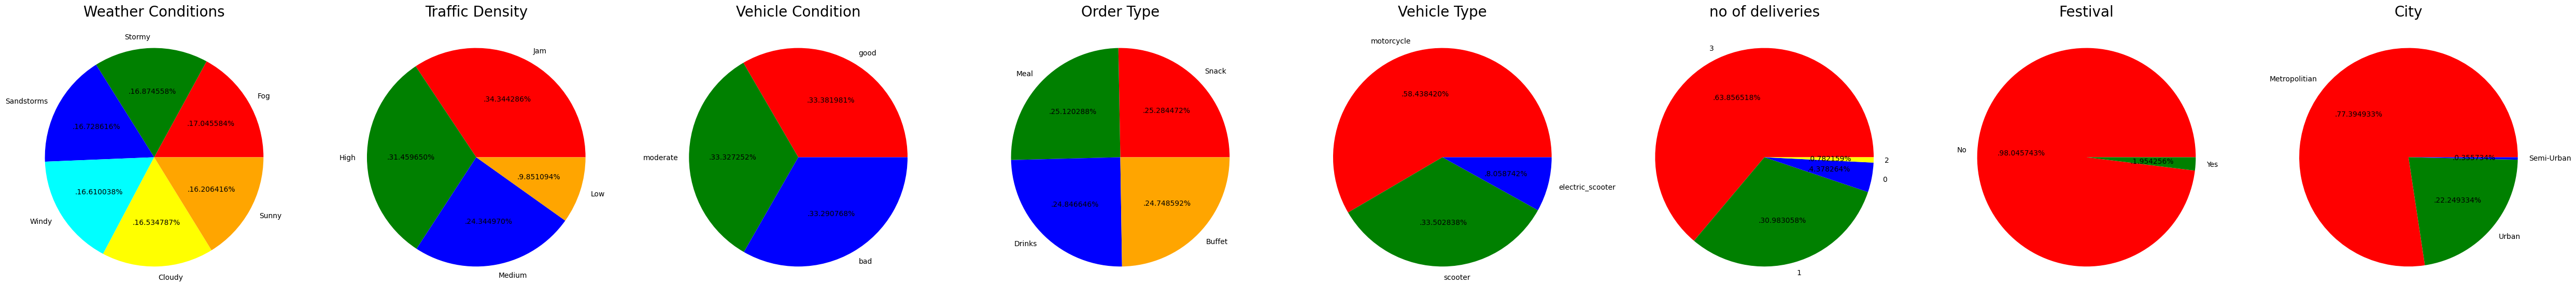

In [52]:
plt.rcParams['figure.figsize'] = (50, 25)

plt.subplot(1, 8, 1)
size = df['Weather_conditions'].value_counts()
labels = 'Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'
color = ['red', 'green', 'blue', 'cyan','yellow', 'orange']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Weather Conditions', fontsize = 20)
plt.axis('off')



plt.subplot(1, 8, 2)
size = df['Road_traffic_density'].value_counts()
labels = 'Jam', 'High', 'Medium', 'Low'
color = ['red', 'green', 'blue', 'orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Traffic Density', fontsize = 20)
plt.axis('off')



plt.subplot(1, 8, 3)
size = df['Vehicle_condition'].value_counts()
labels = 'good' , 'moderate', 'bad'
color = ['red','green', 'blue']

plt.pie(size, colors = color,labels = labels, autopct = '.%2f%%')
plt.title('Vehicle Condition', fontsize = 20)
plt.axis('off')


plt.subplot(1, 8, 4)
size = df['Type_of_order'].value_counts()
labels = 'Snack', 'Meal', 'Drinks', 'Buffet'
color = ['red','green', 'blue', 'orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Order Type', fontsize = 20)
plt.axis('off')


plt.subplot(1, 8, 5)
size = df['Type_of_vehicle'].value_counts()
labels = 'motorcycle', 'scooter', 'electric_scooter'
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Vehicle Type', fontsize = 20)
plt.axis('off')

plt.subplot(1, 8, 6)
size = df['multiple_deliveries'].value_counts()
labels = '3', '1', '0', '2'
color = ['red', 'green', 'blue', 'yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('no of deliveries', fontsize = 20)
plt.axis('off')

plt.subplot(1, 8, 7)
size = df['Festival'].value_counts()
labels = 'No', 'Yes'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Festival', fontsize = 20)
plt.axis('off')

plt.subplot(1, 8, 8)
size = df['City'].value_counts()
labels = 'Metropolitian', 'Urban', 'Semi-Urban'
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('City', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


### comparing density of traffic while delivering the food  

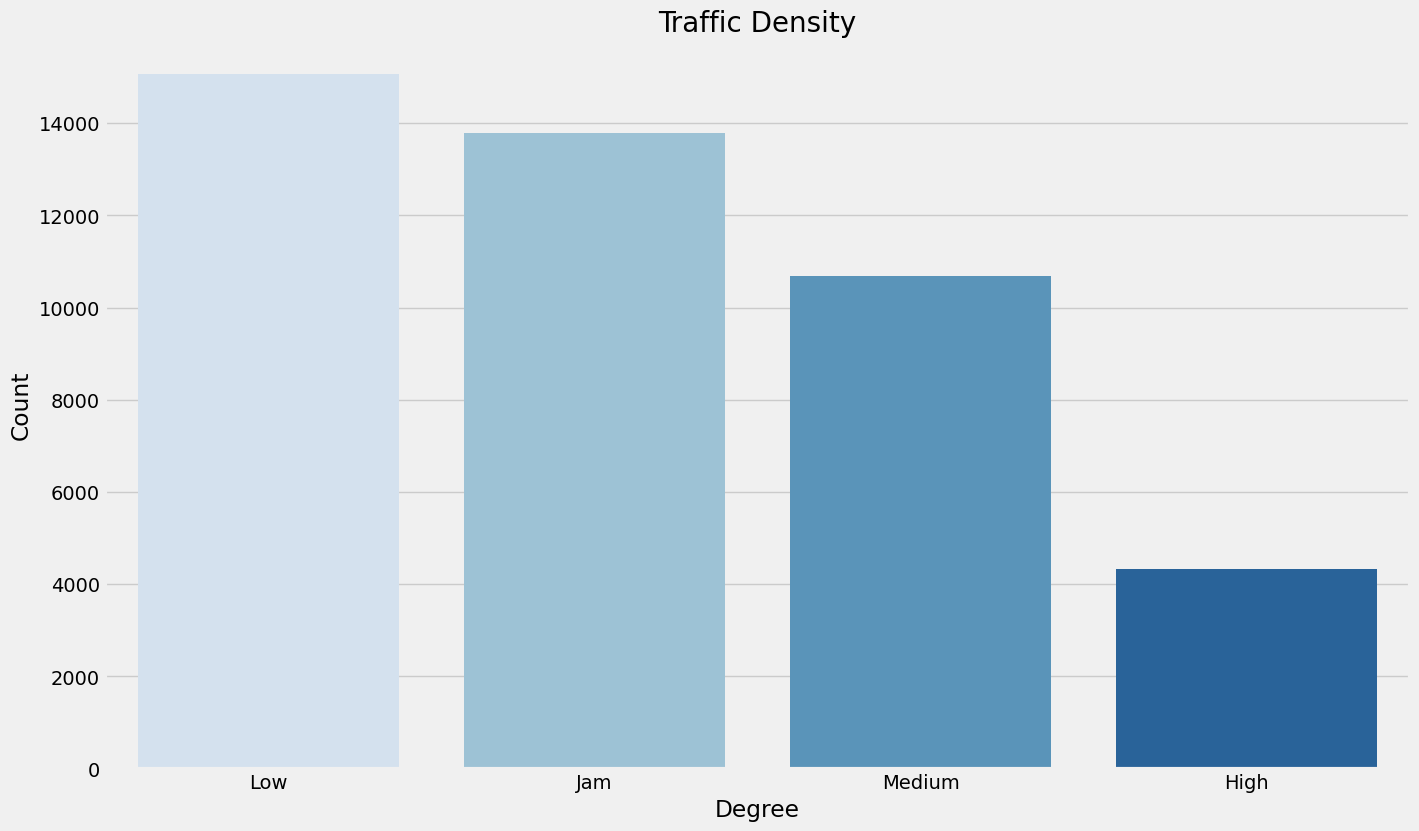

In [53]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

traffic_density_counts = df['Road_traffic_density'].value_counts()
sns.barplot(x=traffic_density_counts.index, y=traffic_density_counts, palette='Blues')

plt.title('Traffic Density', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count') 
plt.show()

### Observation 
- Most of the food is deliver when the traffic is low followed by when there is jam

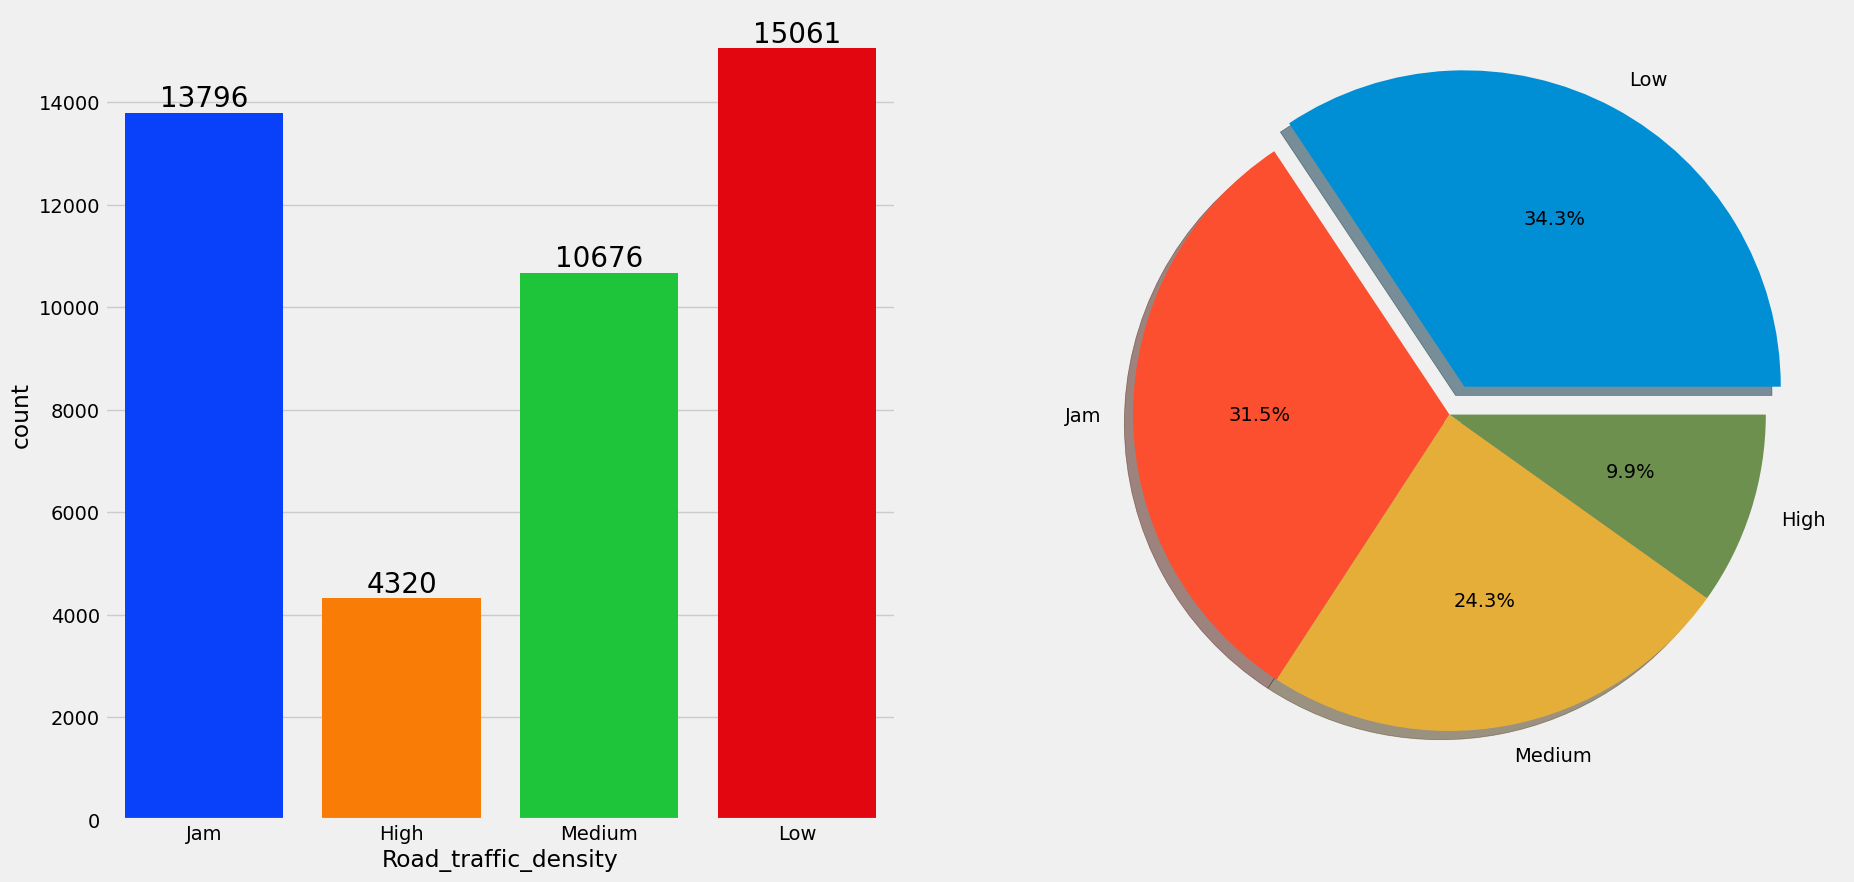

In [54]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Road_traffic_density', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Road_traffic_density'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### comparing vehicle condition when delivering the food

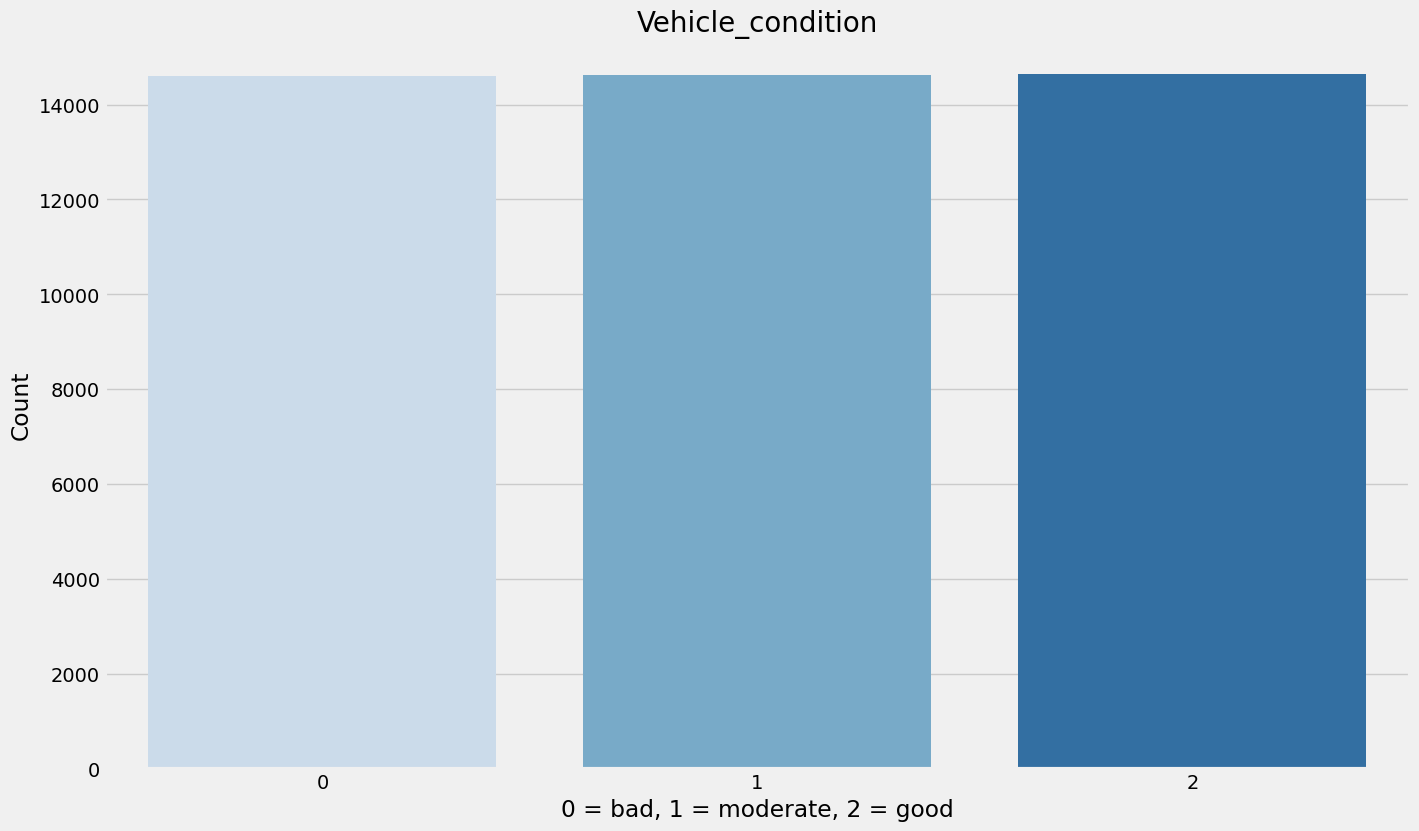

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

Vehicle_condition_counts = df['Vehicle_condition'].value_counts()
sns.barplot(x=Vehicle_condition_counts.index, y=Vehicle_condition_counts, palette='Blues')

plt.title('Vehicle_condition', fontweight=30, fontsize=20)
plt.xlabel('0 = bad, 1 = moderate, 2 = good')
plt.ylabel('Count') 
plt.show()

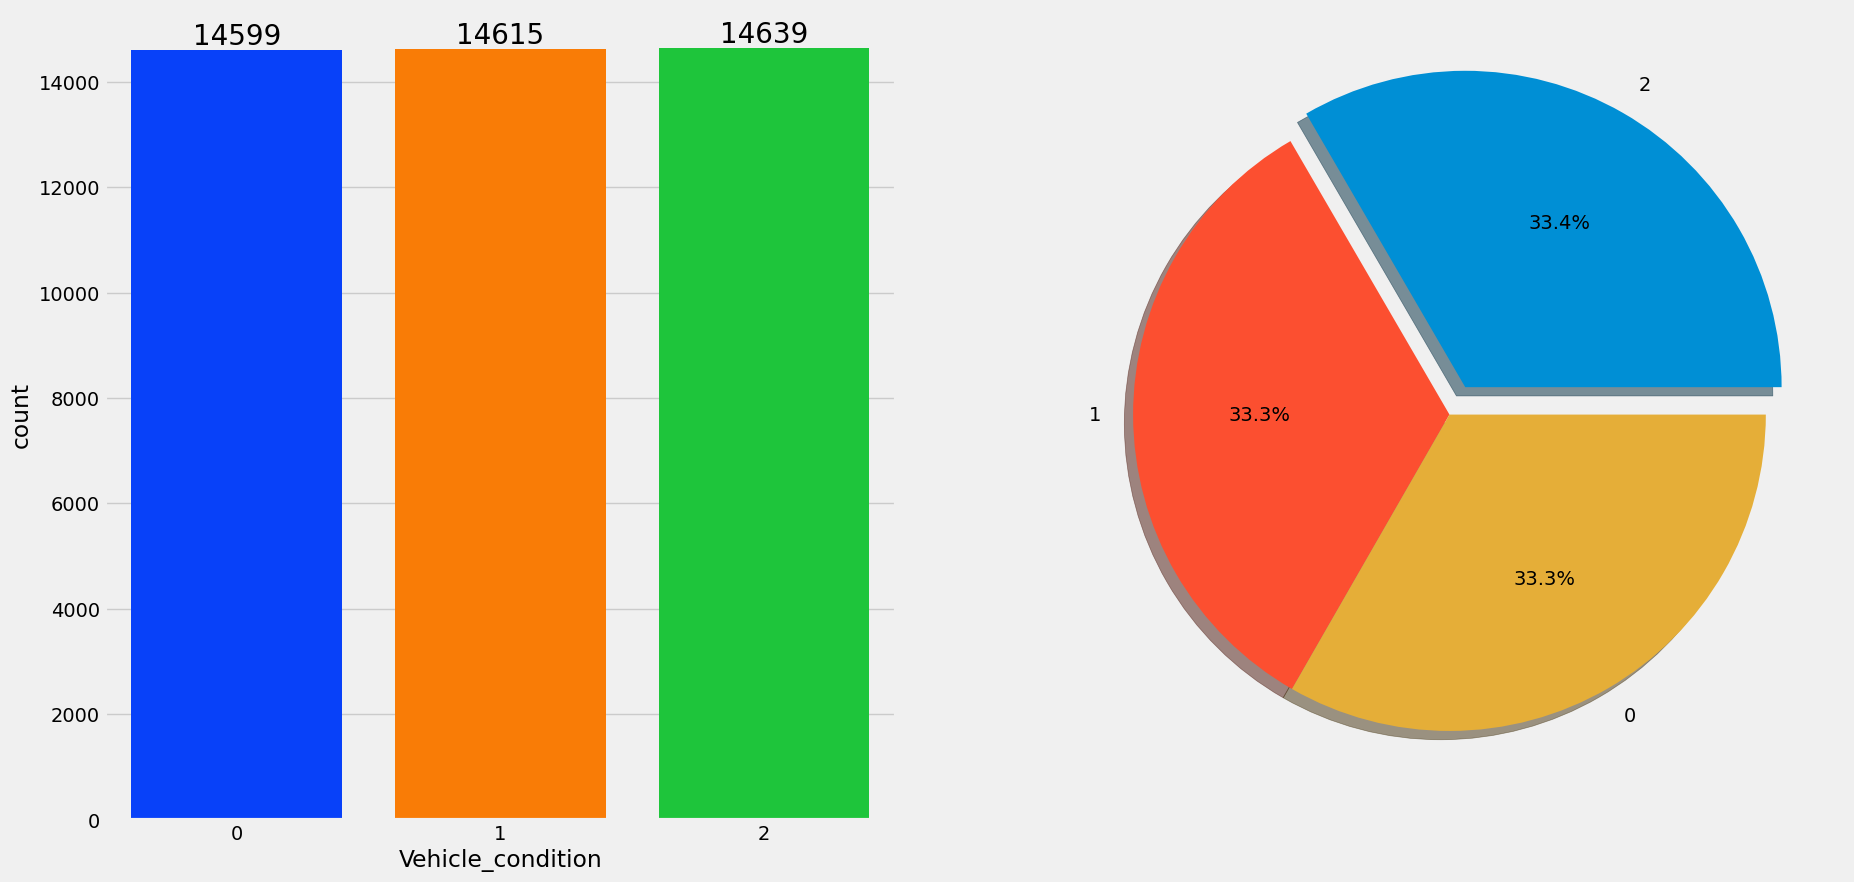

In [56]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Vehicle_condition', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Vehicle_condition'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- the condition of vehicle remains the same throughout the dataset

### Weather conditions

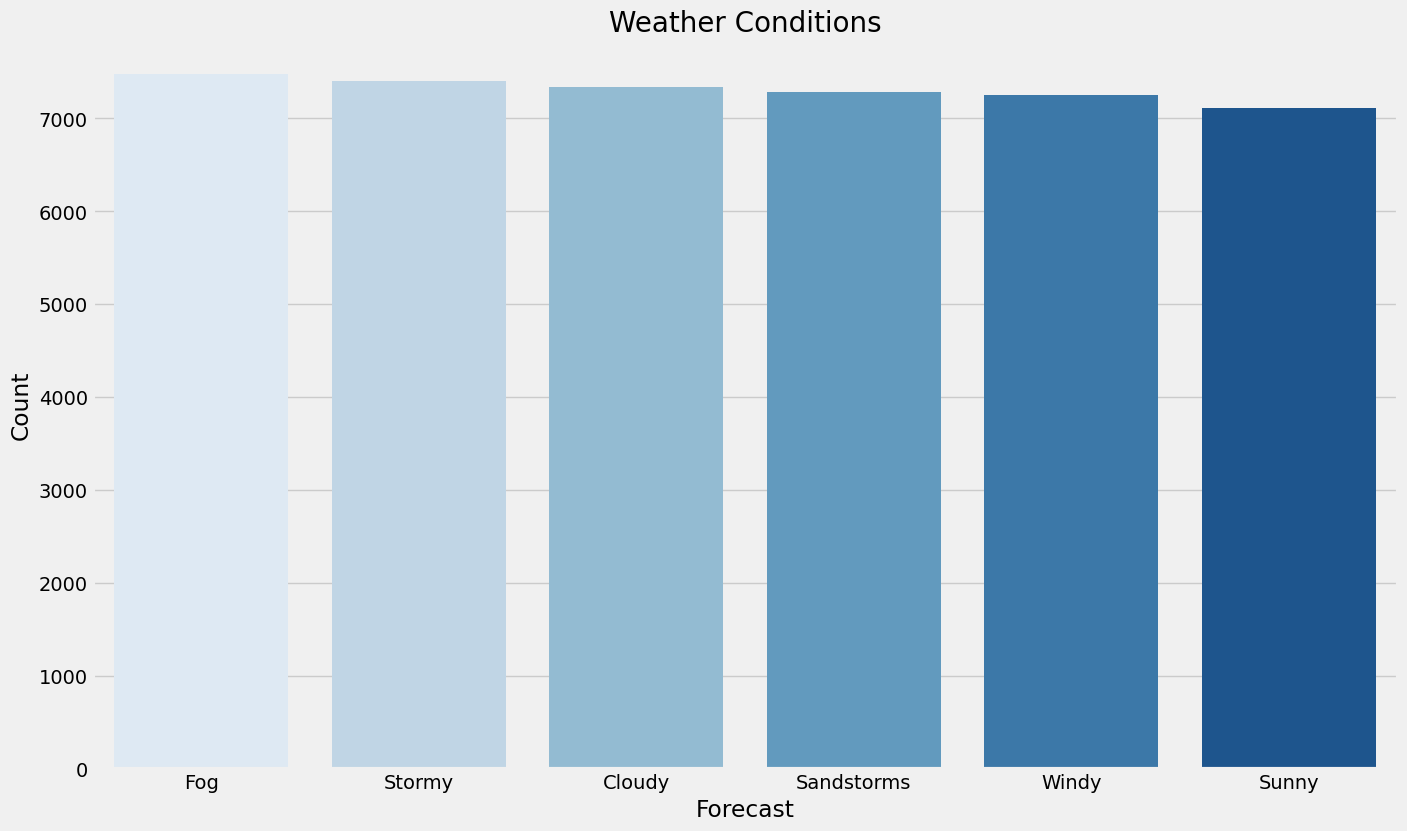

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

Weather_conditions_counts = df['Weather_conditions'].value_counts()
sns.barplot(x=Weather_conditions_counts.index, y=Weather_conditions_counts, palette='Blues')

plt.title('Weather Conditions', fontweight=30, fontsize=20)
plt.xlabel('Forecast')
plt.ylabel('Count') 
plt.show()

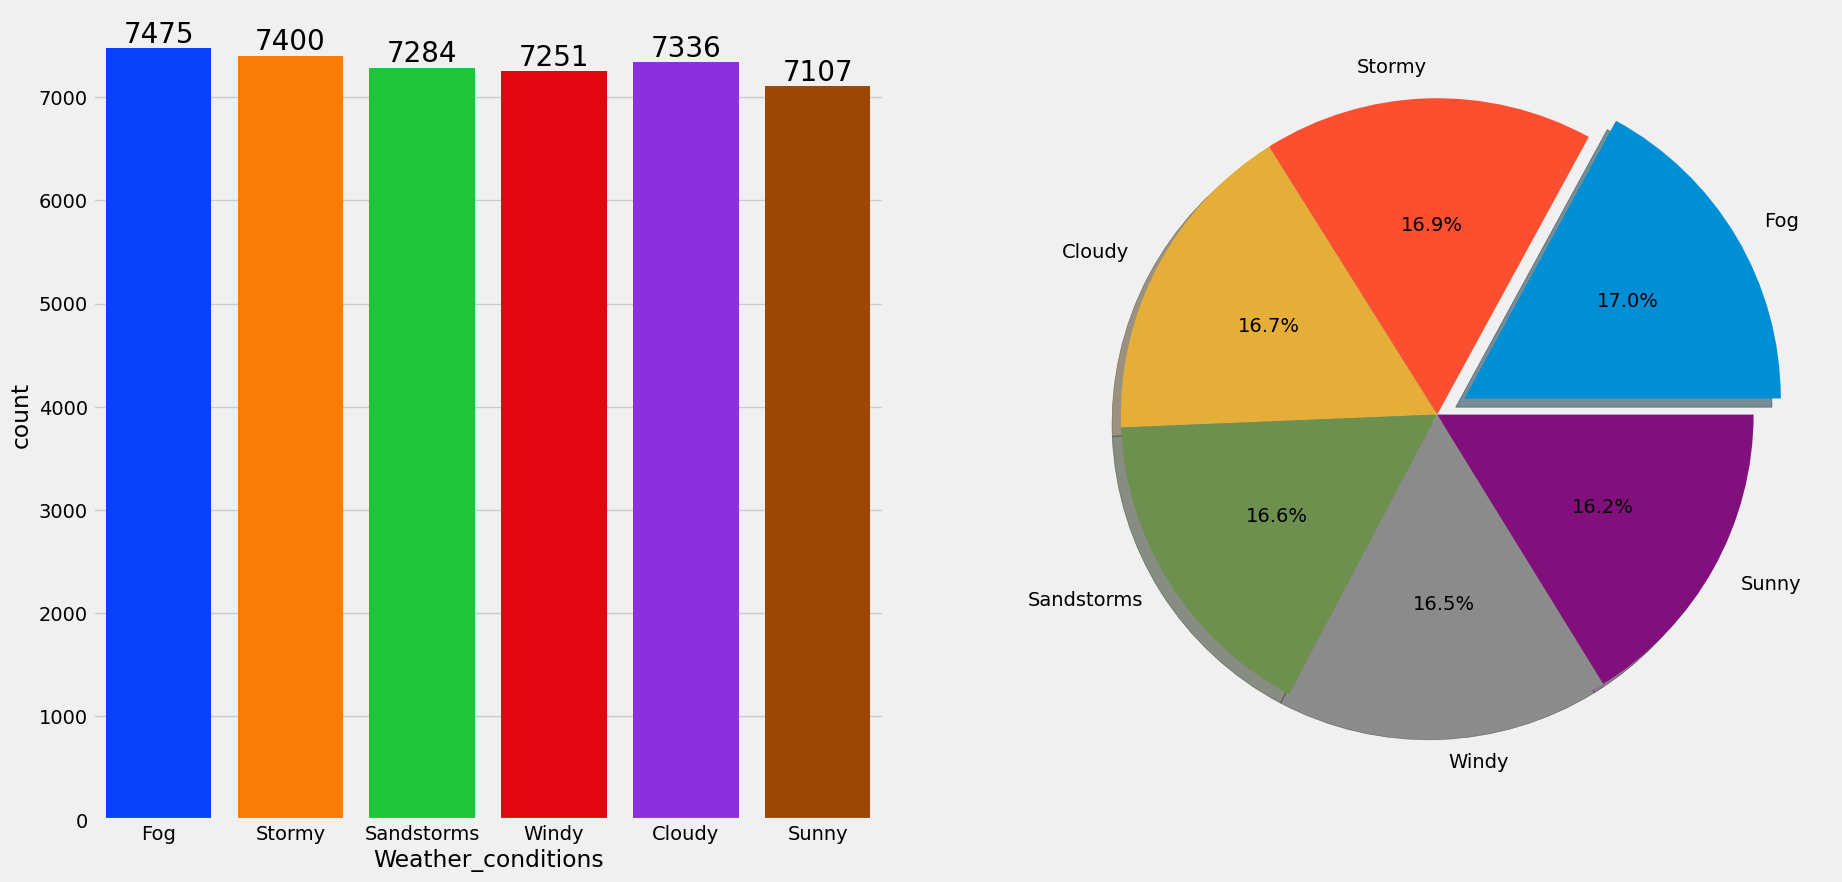

In [58]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Weather_conditions', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Weather_conditions'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- Food has been deliver on all weather conditions

### Order Type

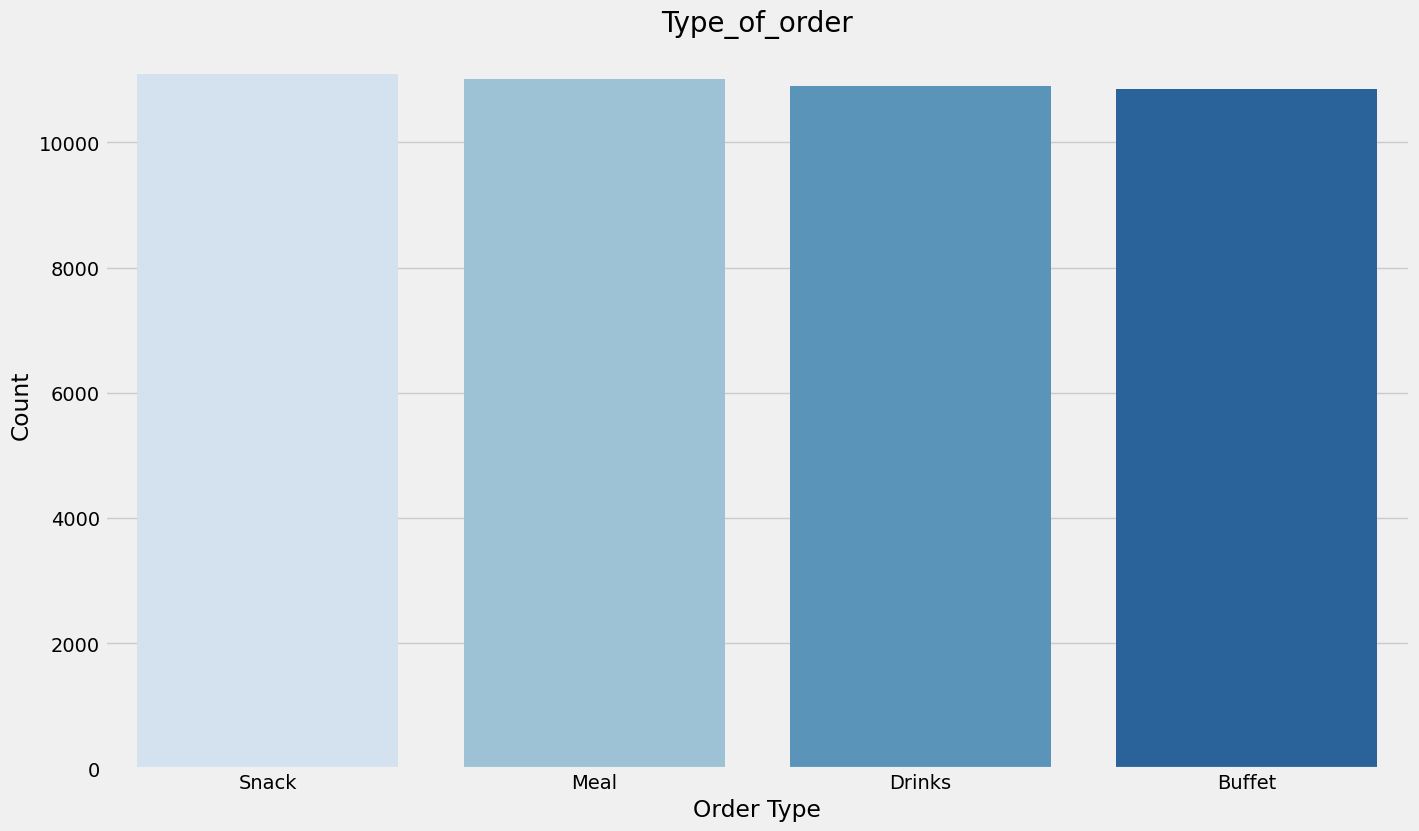

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

Type_of_order_Counts = df['Type_of_order'].value_counts()
sns.barplot(x=Type_of_order_Counts.index, y=Type_of_order_Counts, palette='Blues')

plt.title('Type_of_order', fontweight=30, fontsize=20)
plt.xlabel('Order Type')
plt.ylabel('Count') 
plt.show()

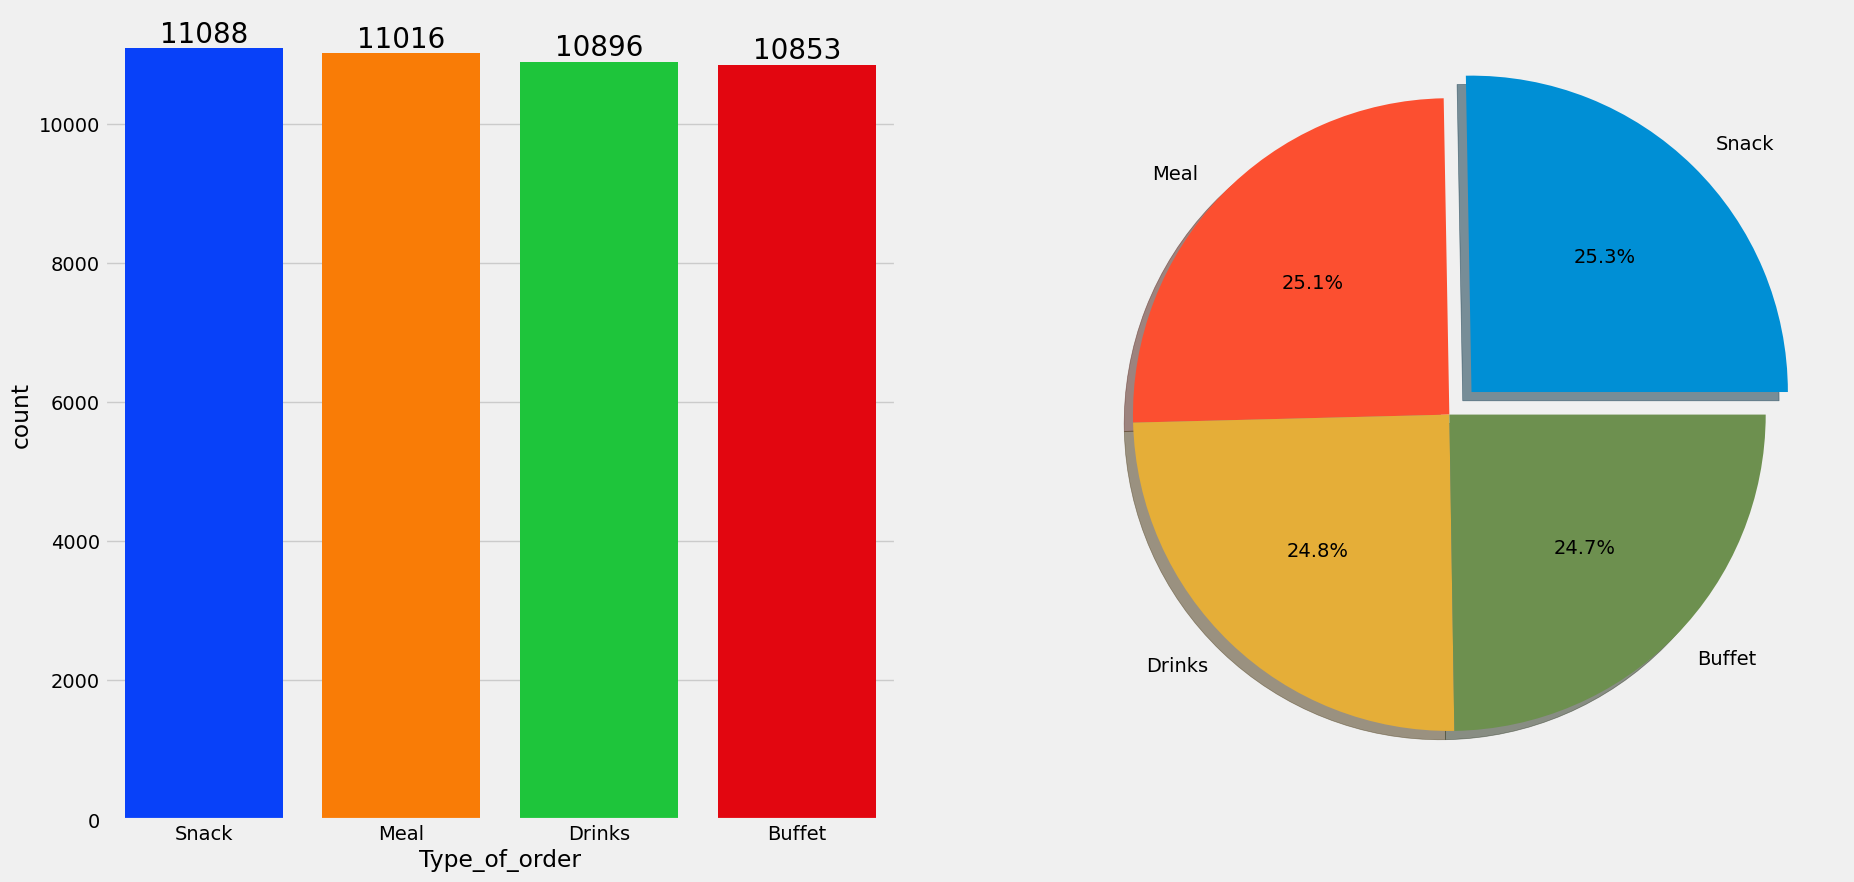

In [60]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Type_of_order', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Type_of_order'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- Customers order all type of food 

### Type of vehicle use when delivering the food

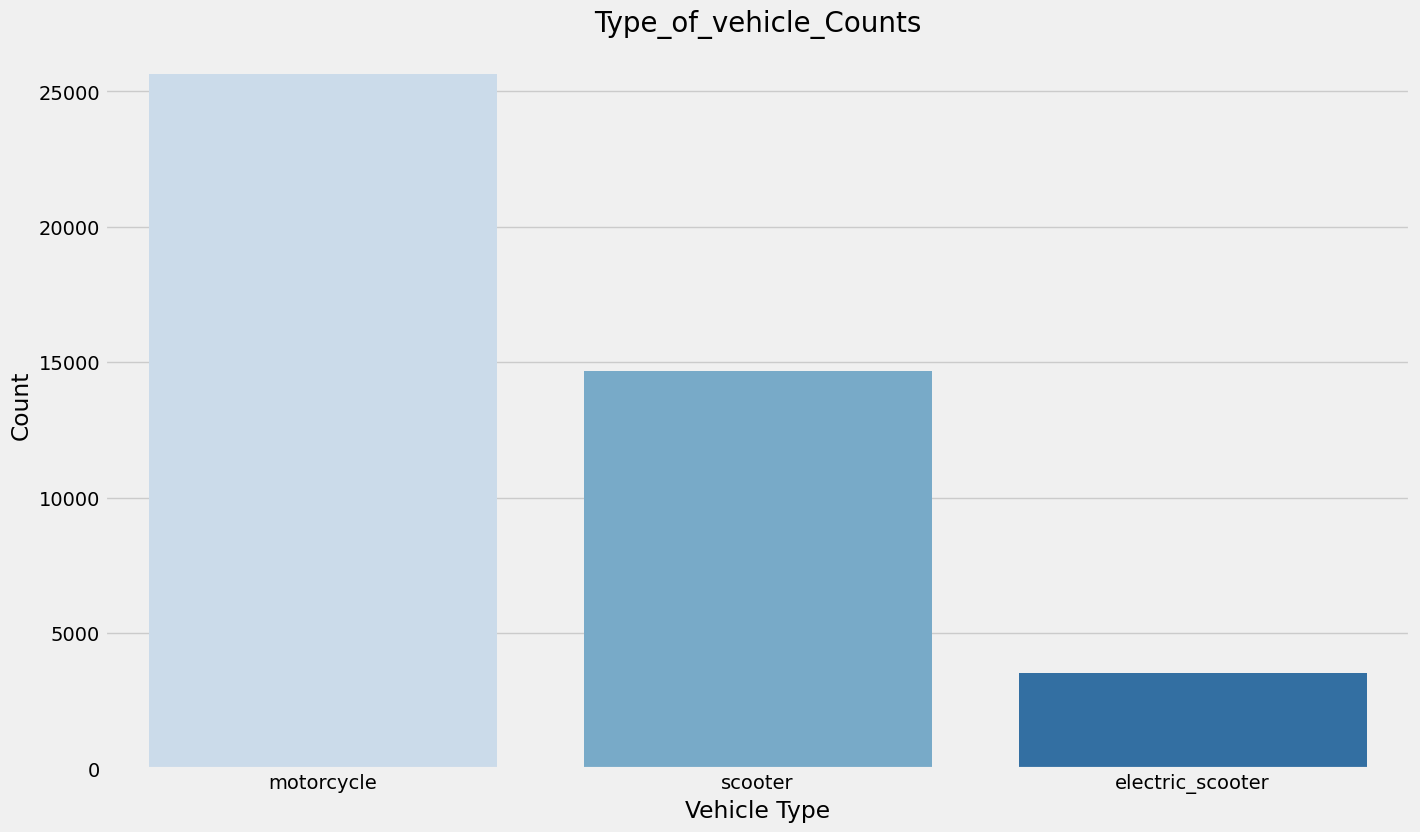

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

Type_of_vehicle_Counts = df['Type_of_vehicle'].value_counts()
sns.barplot(x=Type_of_vehicle_Counts.index, y=Type_of_vehicle_Counts, palette='Blues')

plt.title('Type_of_vehicle_Counts', fontweight=30, fontsize=20)
plt.xlabel('Vehicle Type')
plt.ylabel('Count') 
plt.show()

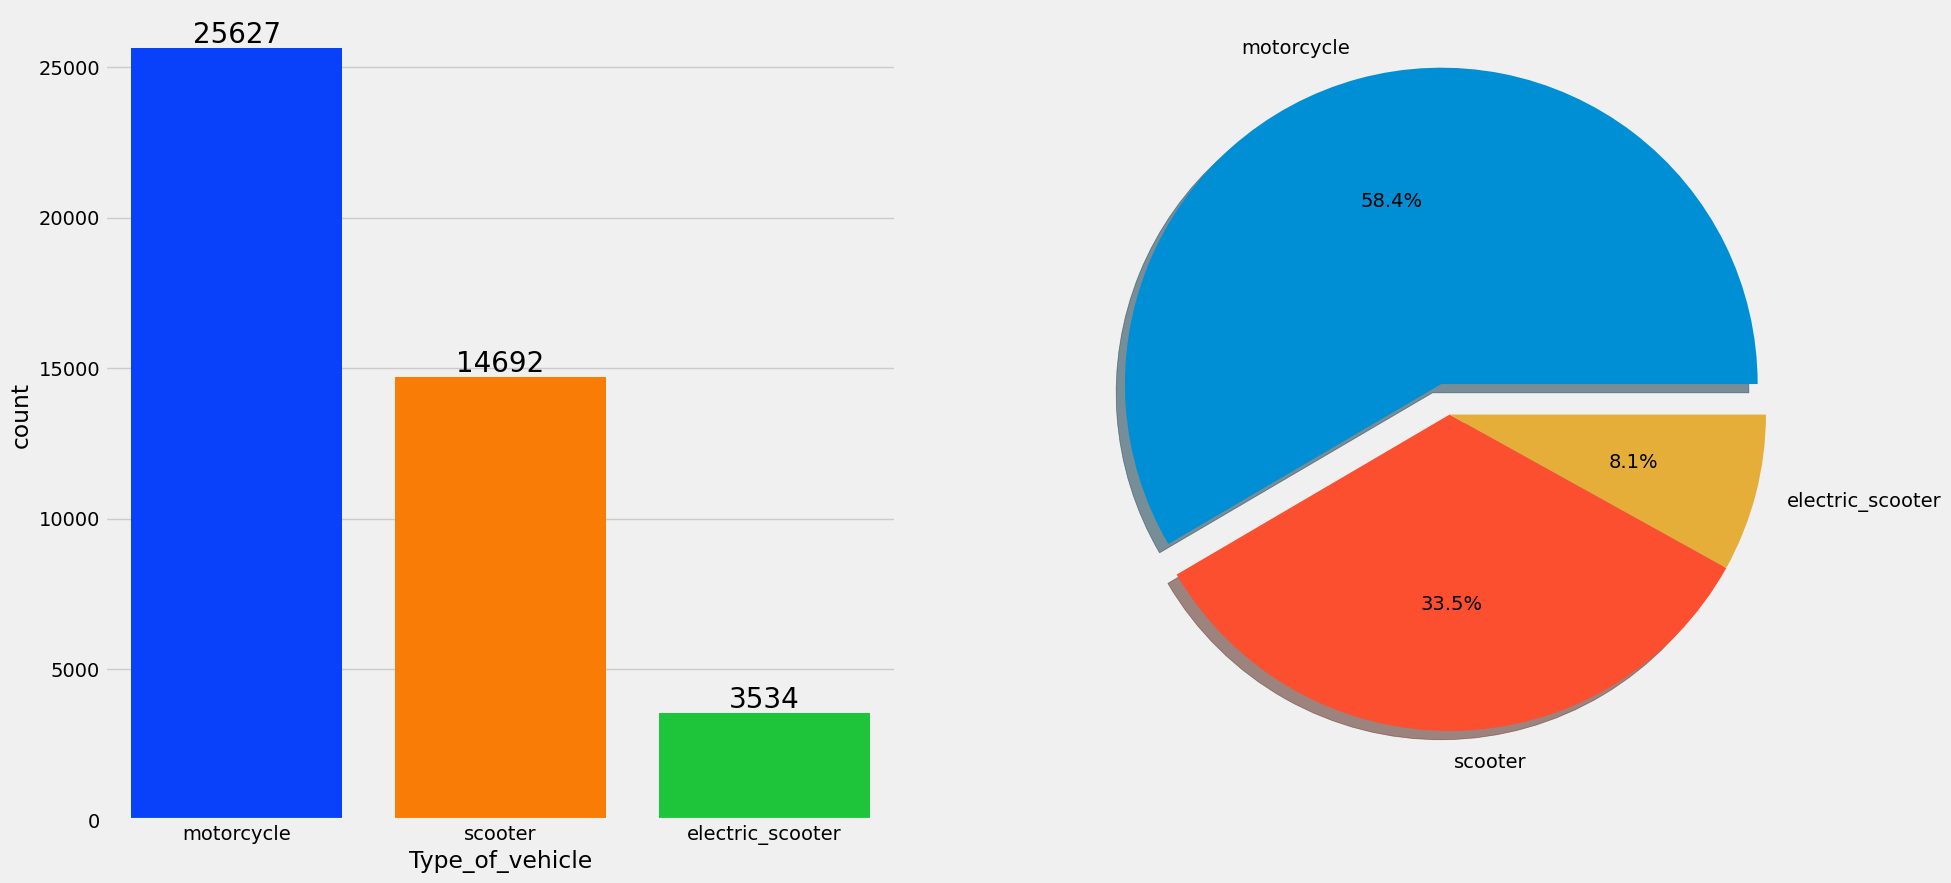

In [62]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Type_of_vehicle', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Type_of_vehicle'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- Most the delivery executive use motorcycle to deliver the food. This might be because the mileage of motorcycle is best out of other vehicles

### No. of Deliveries

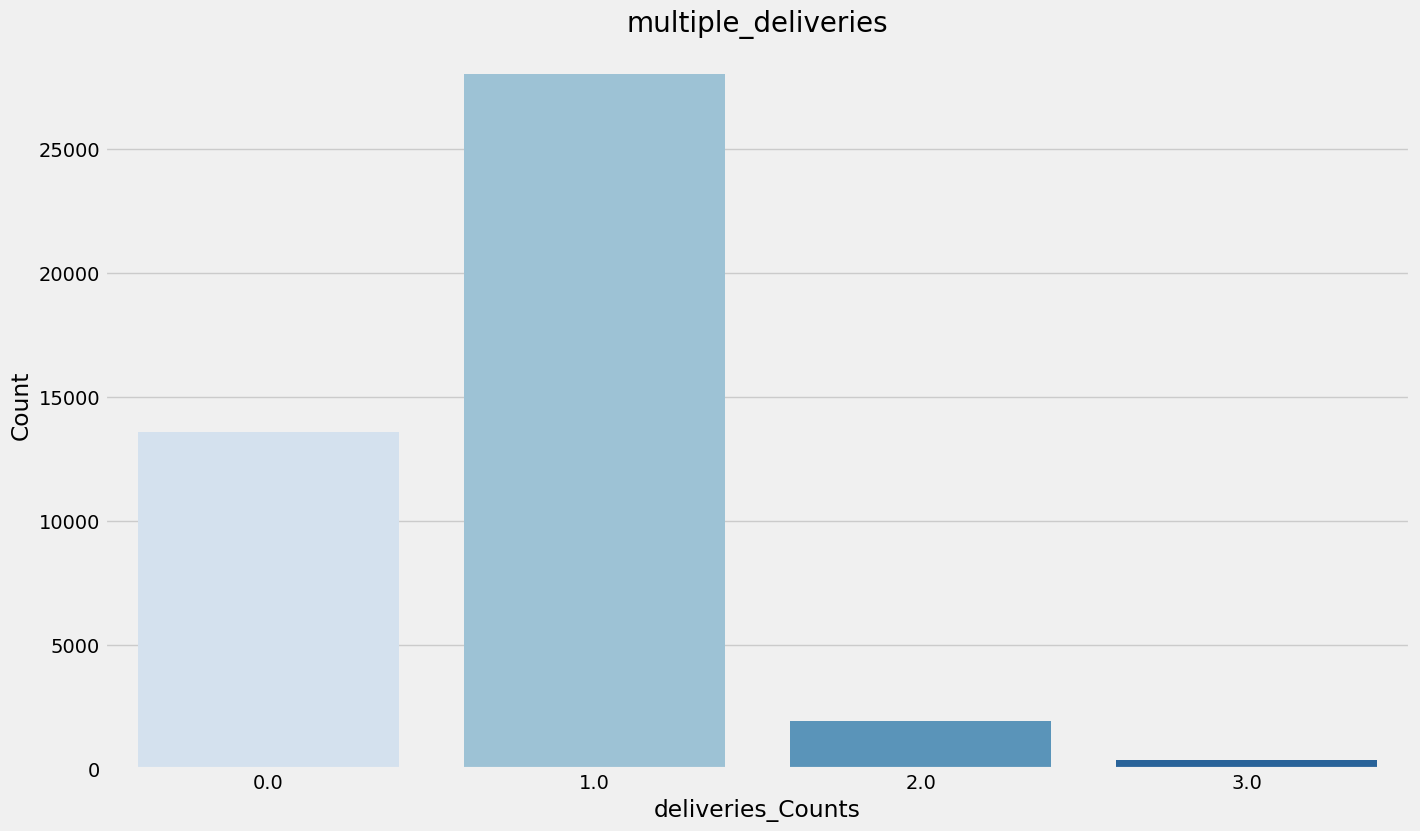

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

multiple_deliveries_Counts = df['multiple_deliveries'].value_counts()
sns.barplot(x=multiple_deliveries_Counts.index, y=multiple_deliveries_Counts, palette='Blues')

plt.title('multiple_deliveries', fontweight=30, fontsize=20)
plt.xlabel('deliveries_Counts')
plt.ylabel('Count') 
plt.show()

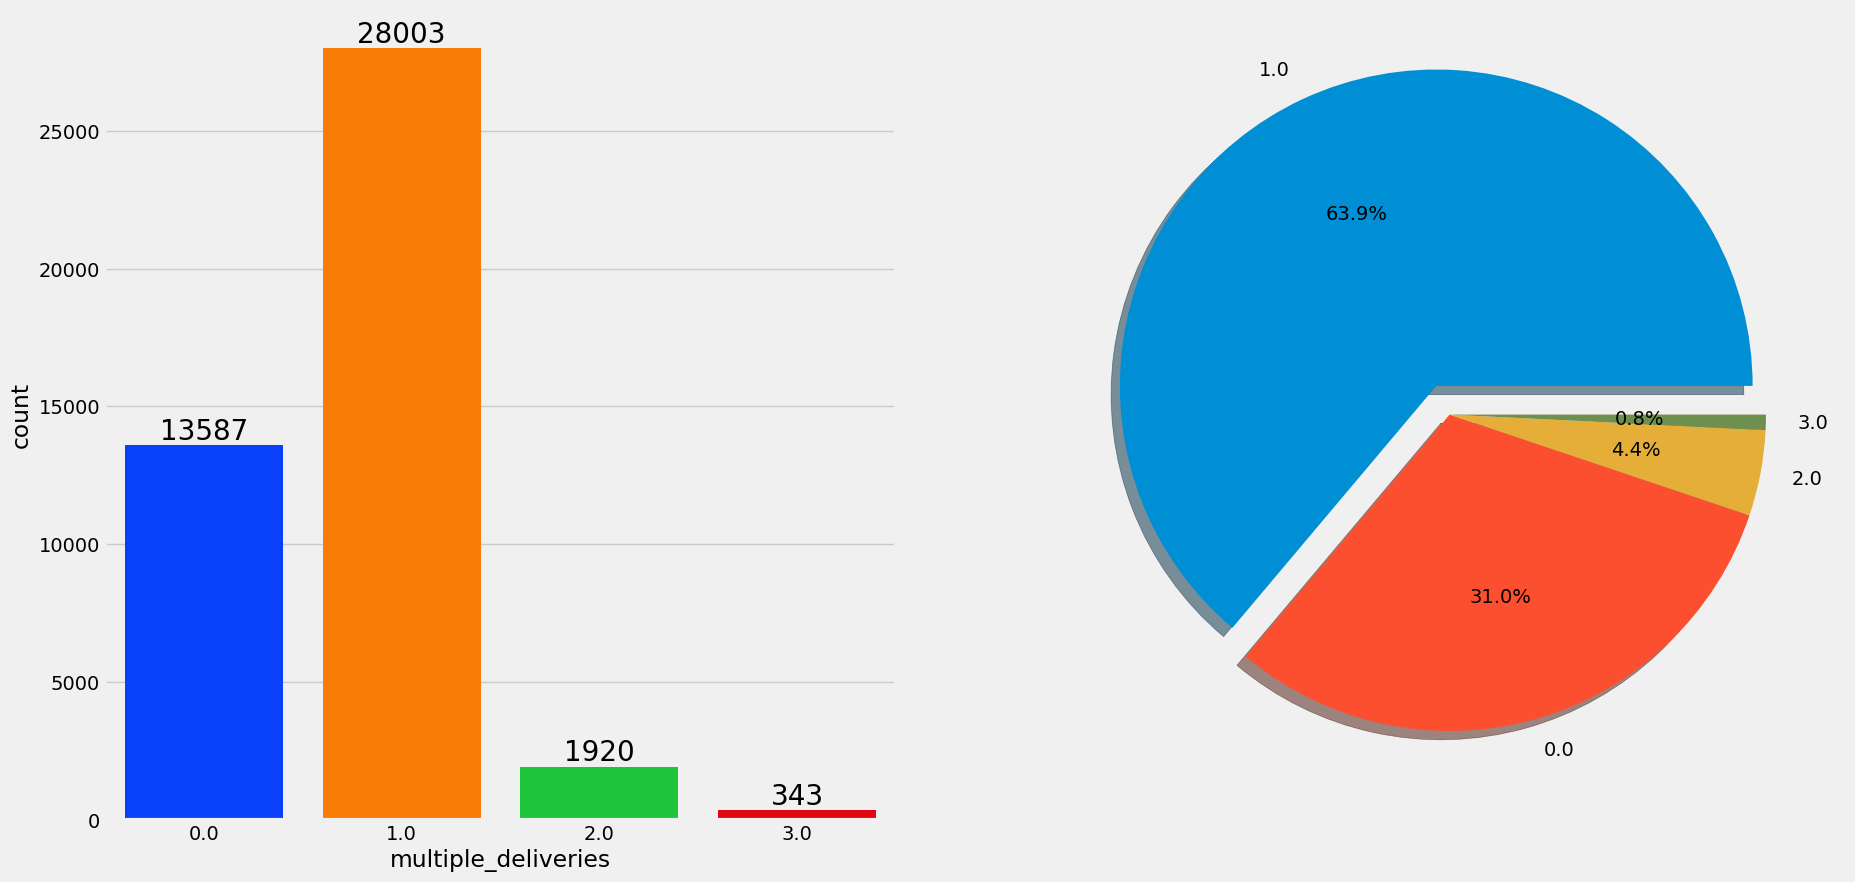

In [64]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='multiple_deliveries', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['multiple_deliveries'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- most of the delivery executives have only 1 order while delivering the food

### Festival 

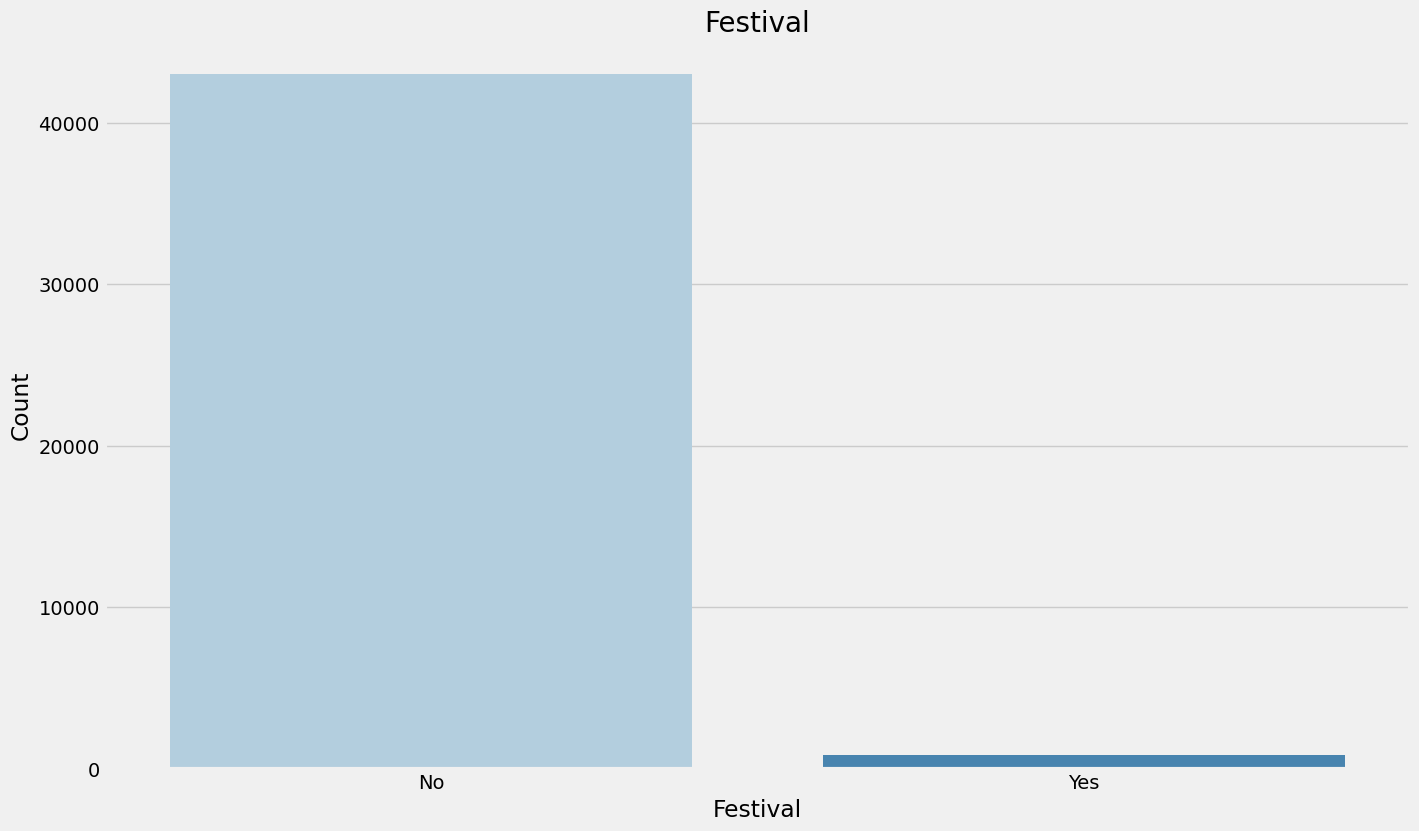

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

Festival_Counts = df['Festival'].value_counts()
sns.barplot(x=Festival_Counts.index, y=Festival_Counts, palette='Blues')

plt.title('Festival', fontweight=30, fontsize=20)
plt.xlabel('Festival')
plt.ylabel('Count') 
plt.show()

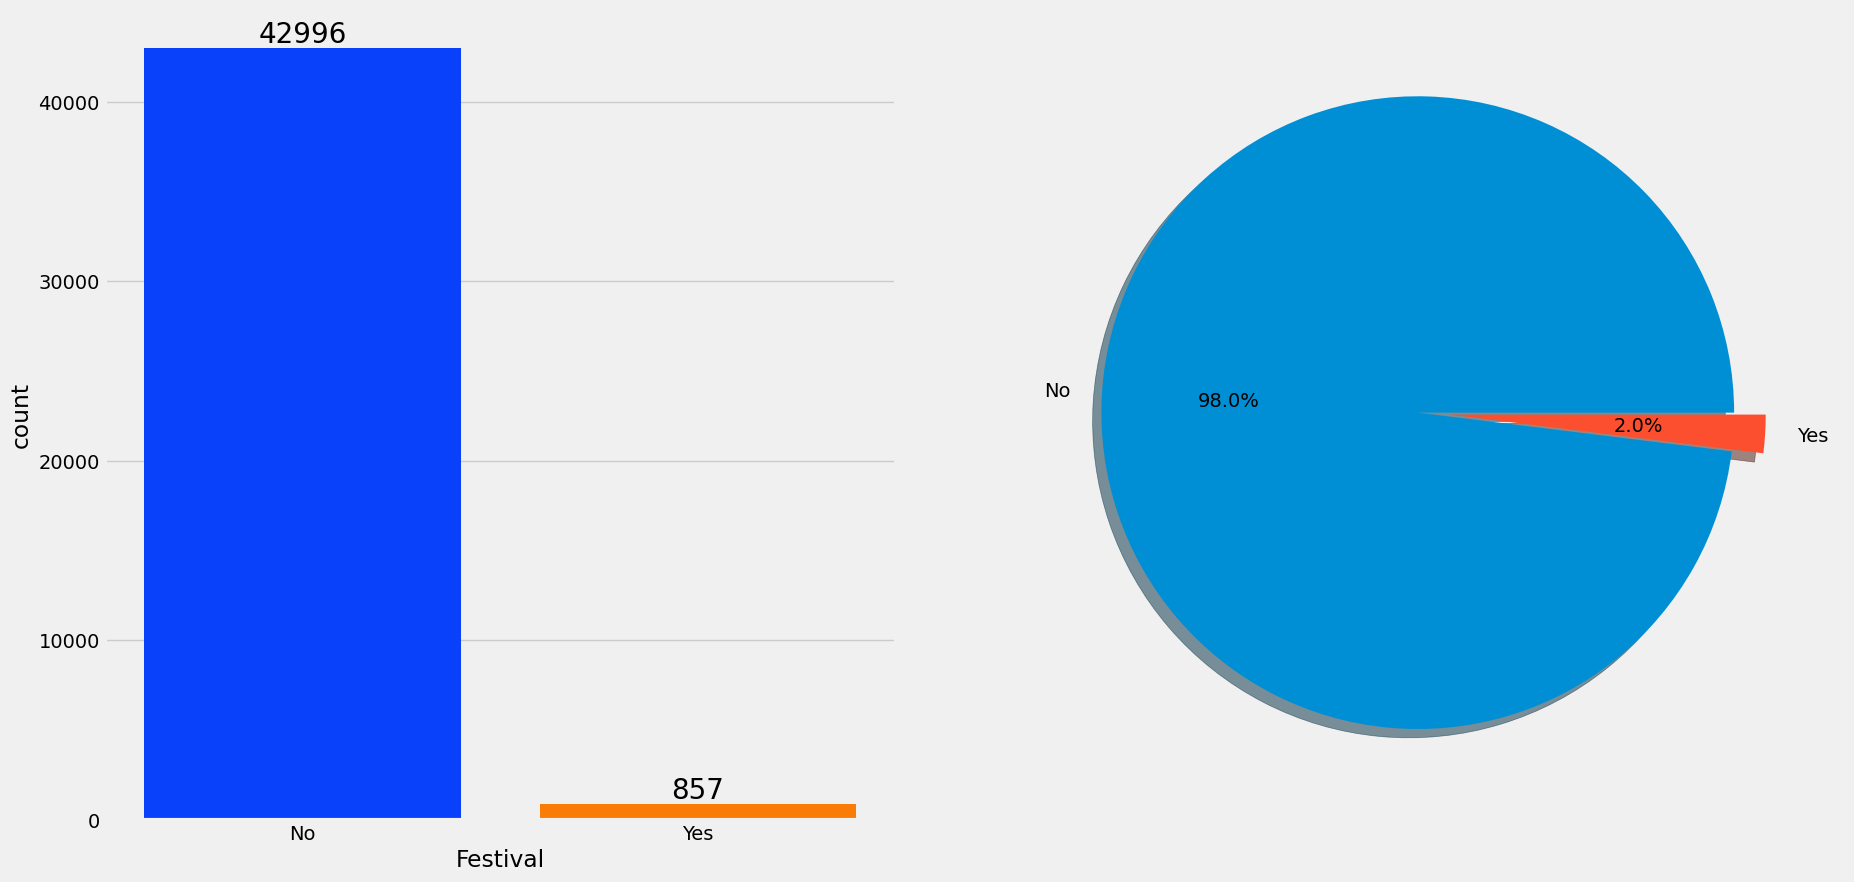

In [66]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Festival', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Festival'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Kind of cities

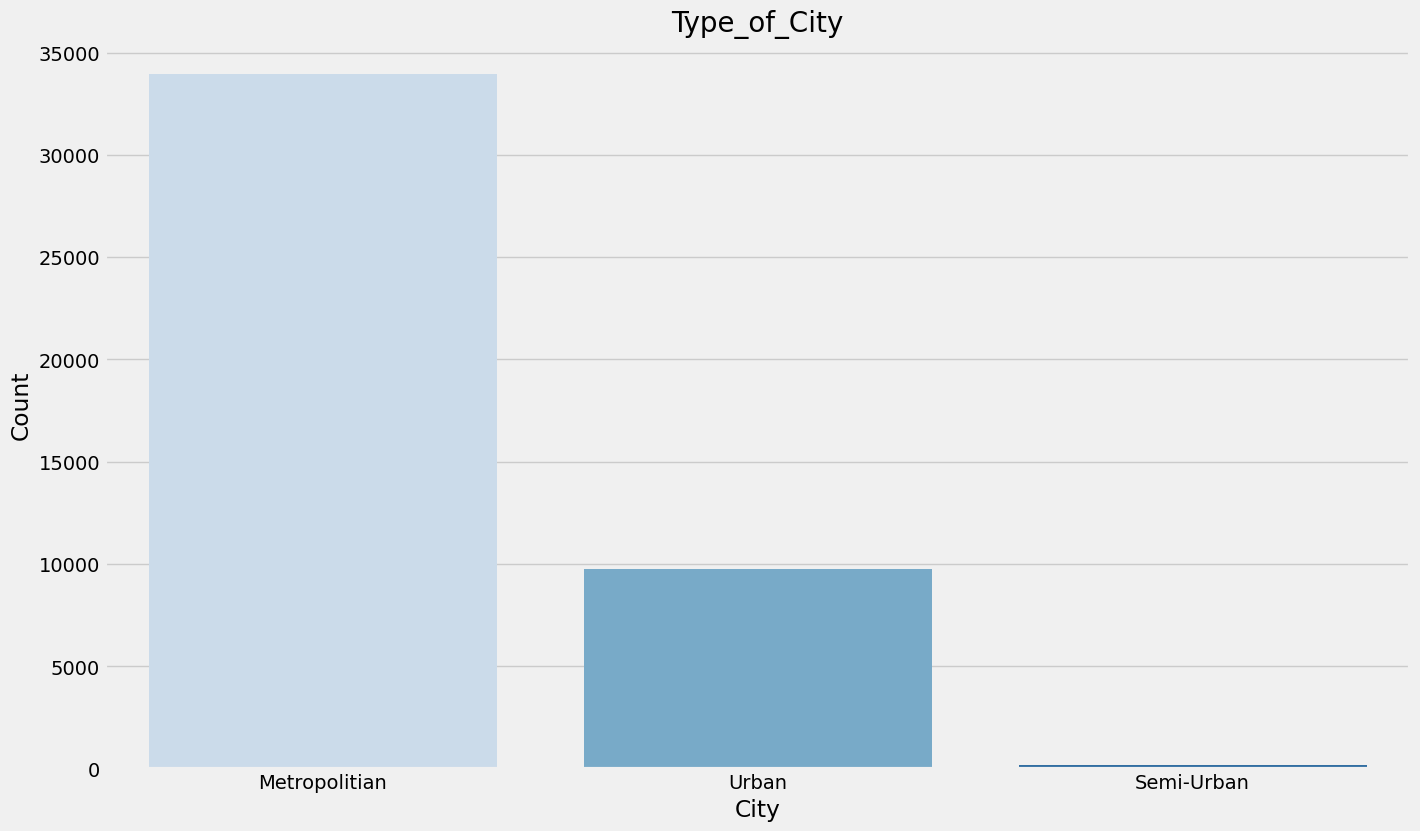

In [67]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

City_Counts = df['City'].value_counts()
sns.barplot(x=City_Counts.index, y=City_Counts, palette='Blues')

plt.title('Type_of_City', fontweight=30, fontsize=20)
plt.xlabel('City')
plt.ylabel('Count') 
plt.show()

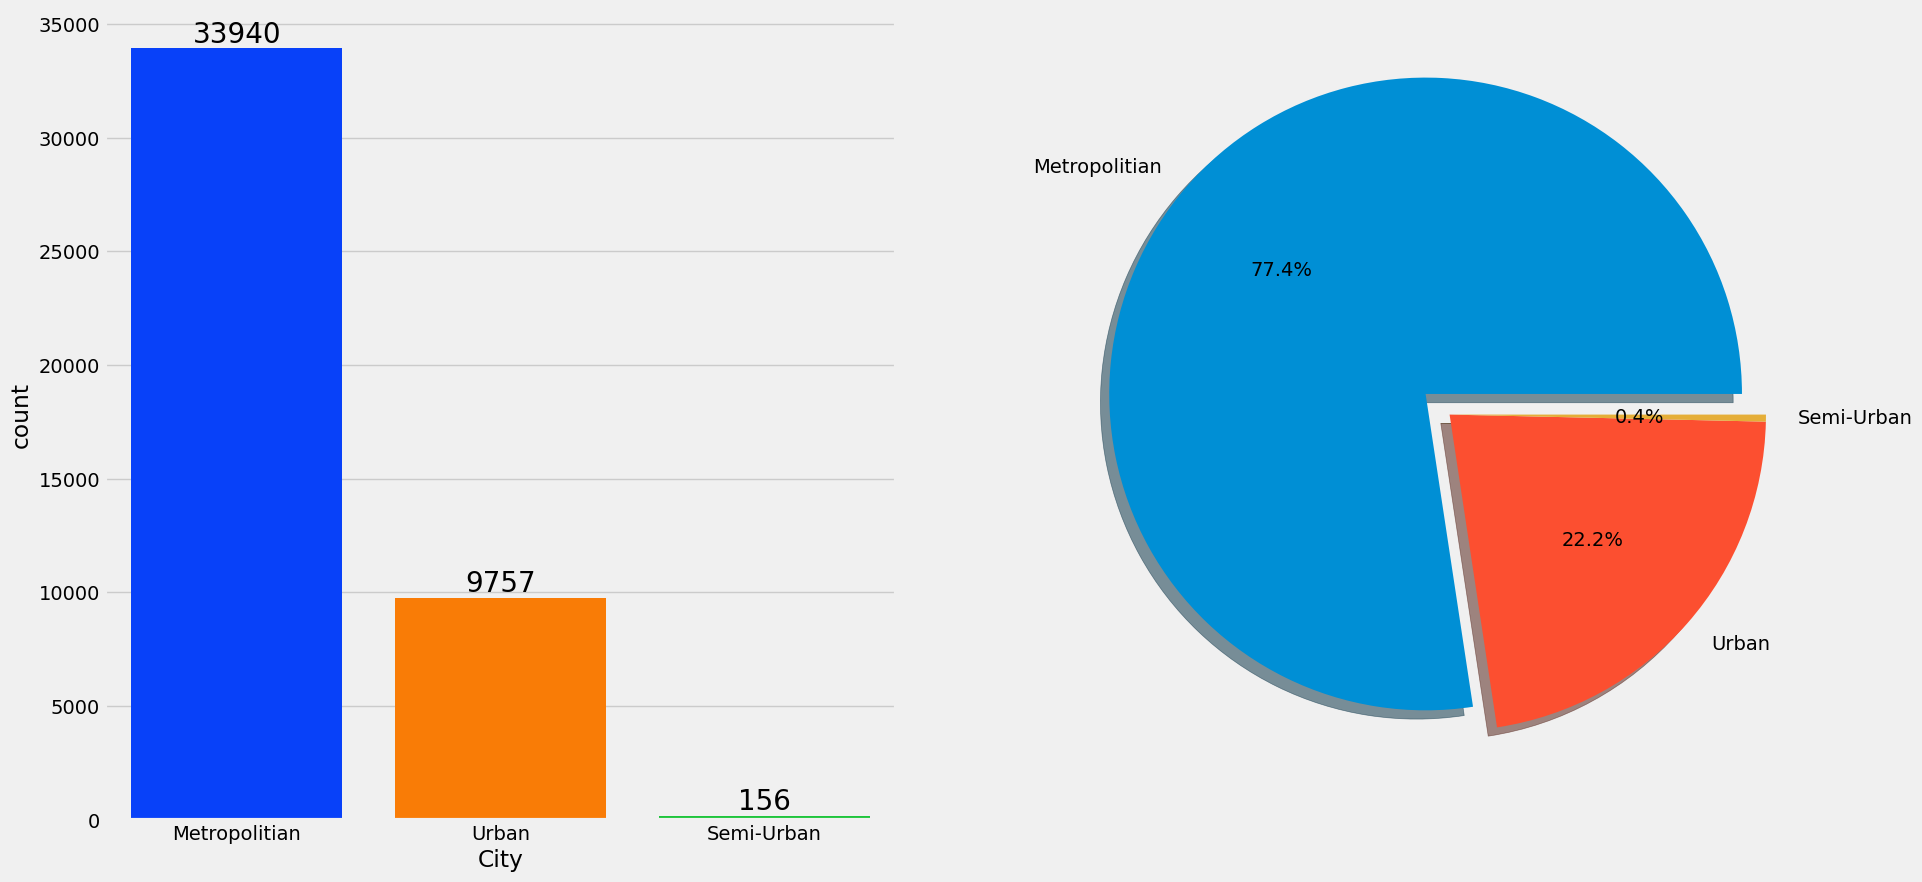

In [68]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='City', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['City'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- Metropolitan cities have ordered the food most no of time

### Time at which the food ordered

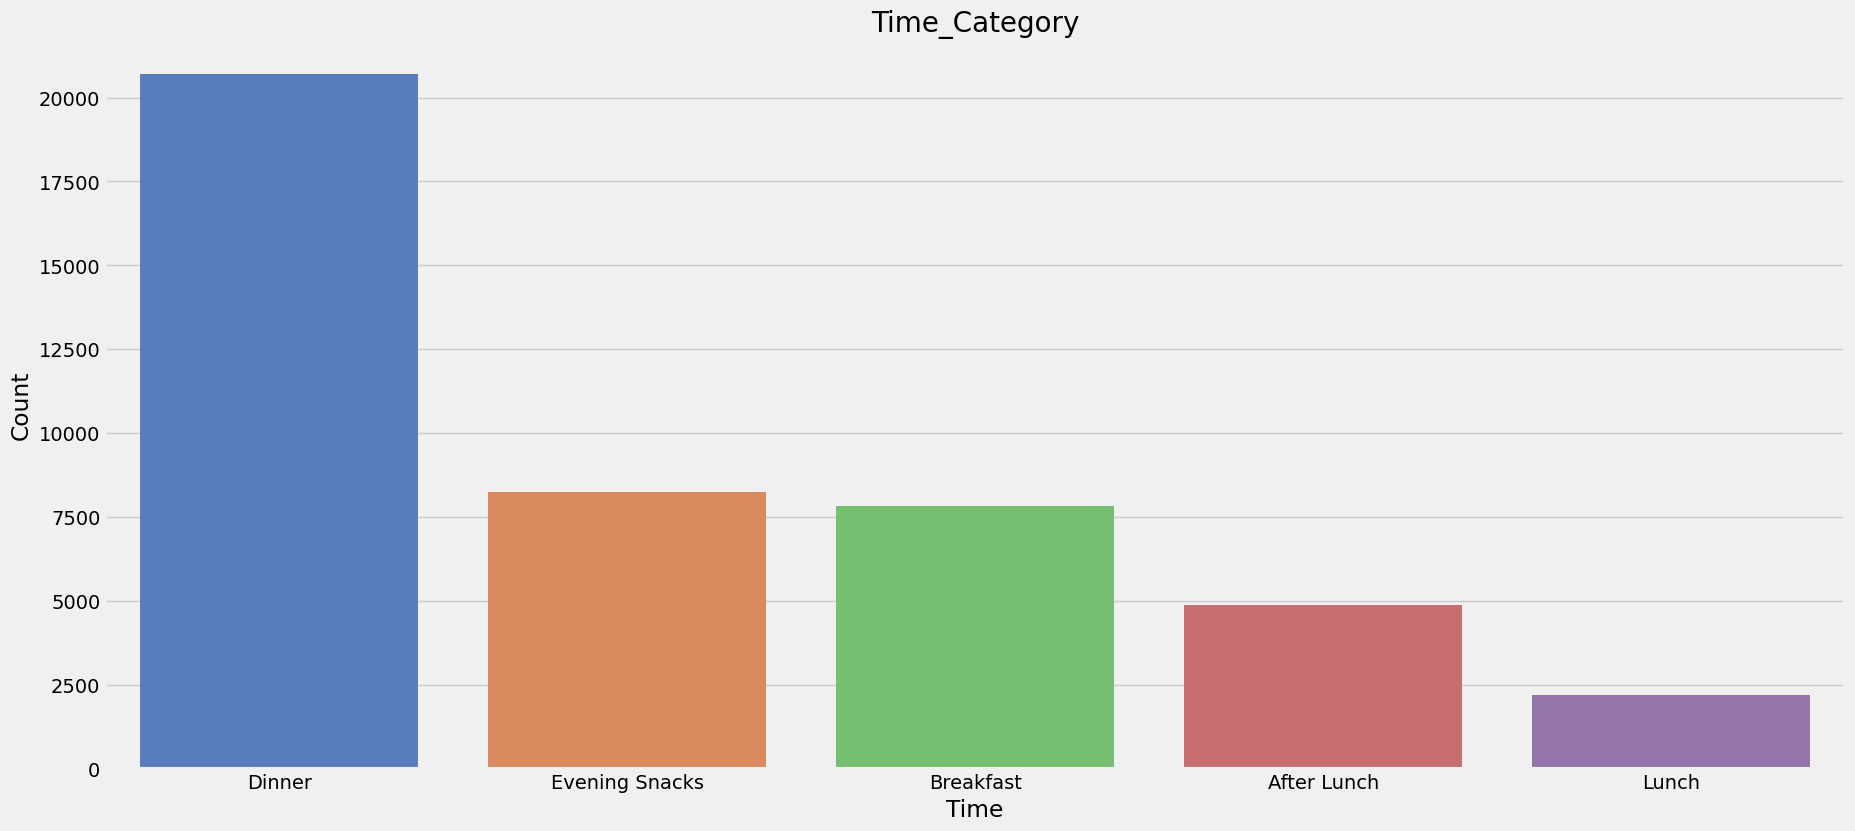

In [69]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

Time_Counts = df['Time_Category'].value_counts()
sns.barplot(x=Time_Counts.index, y=Time_Counts, palette='muted')

plt.title('Time_Category', fontweight=30, fontsize=20)
plt.xlabel('Time')
plt.ylabel('Count') 
plt.show()

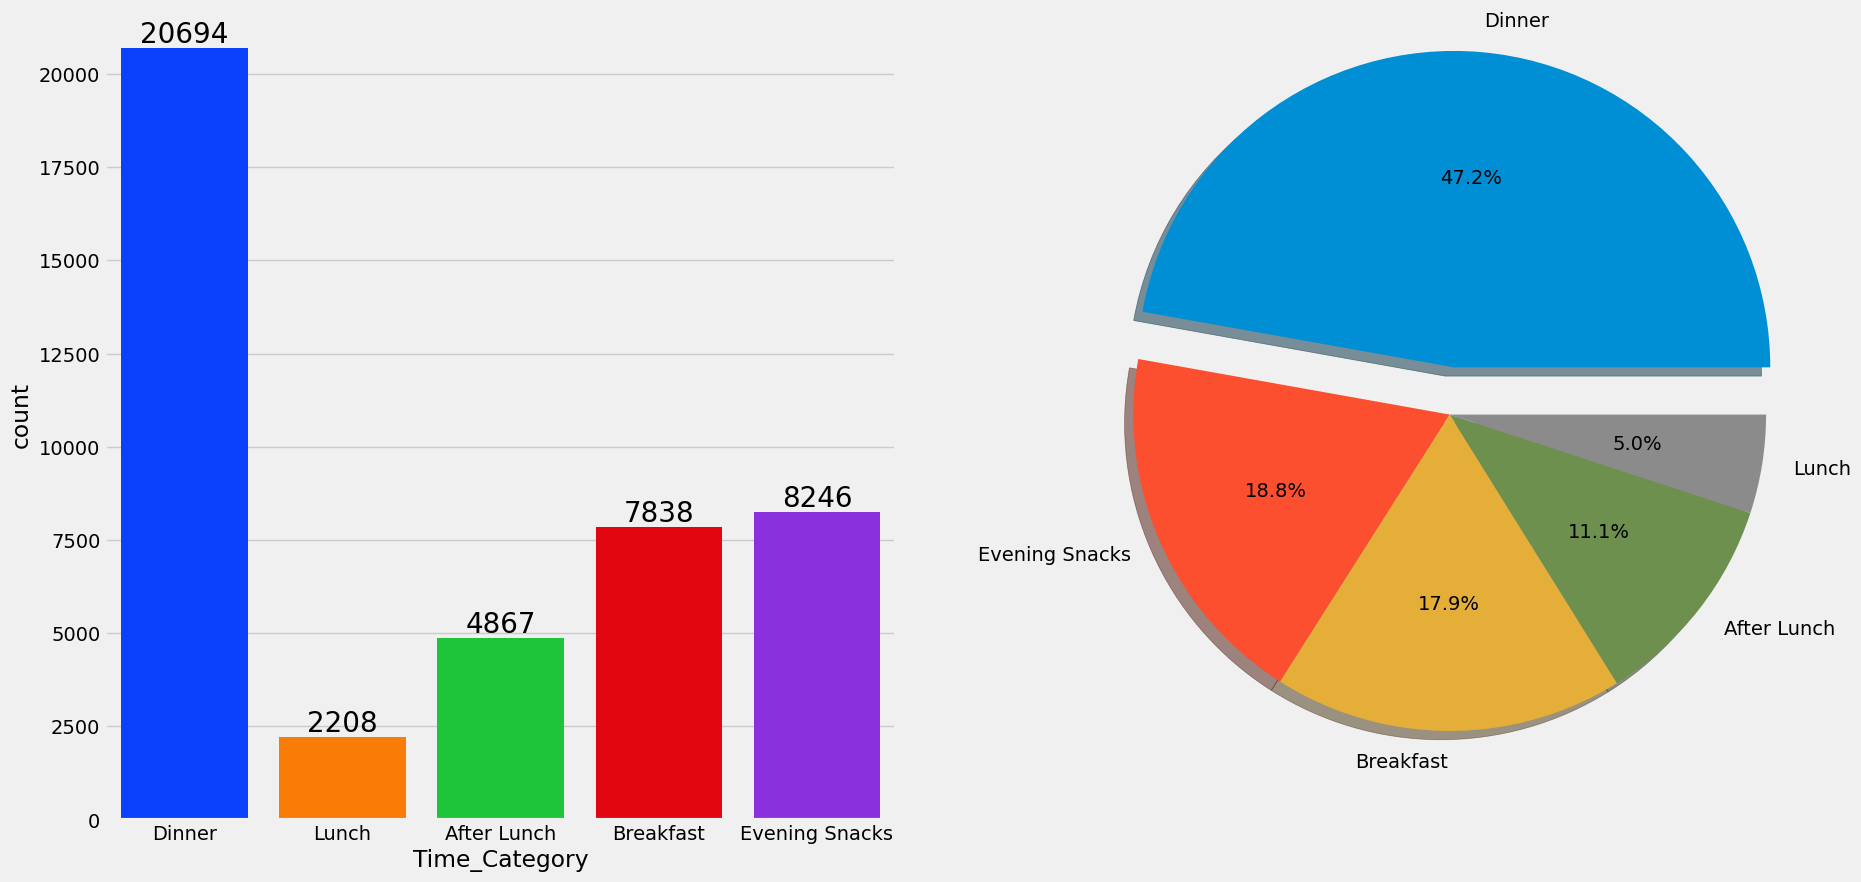

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Time_Category'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Time_Category'].value_counts(),labels=df['Time_Category'].value_counts().index,explode=[0.15,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

### Observation
- The people have ordered dinner most no of times followed by evening snacks.

### Data of no of orders w.r.t cities

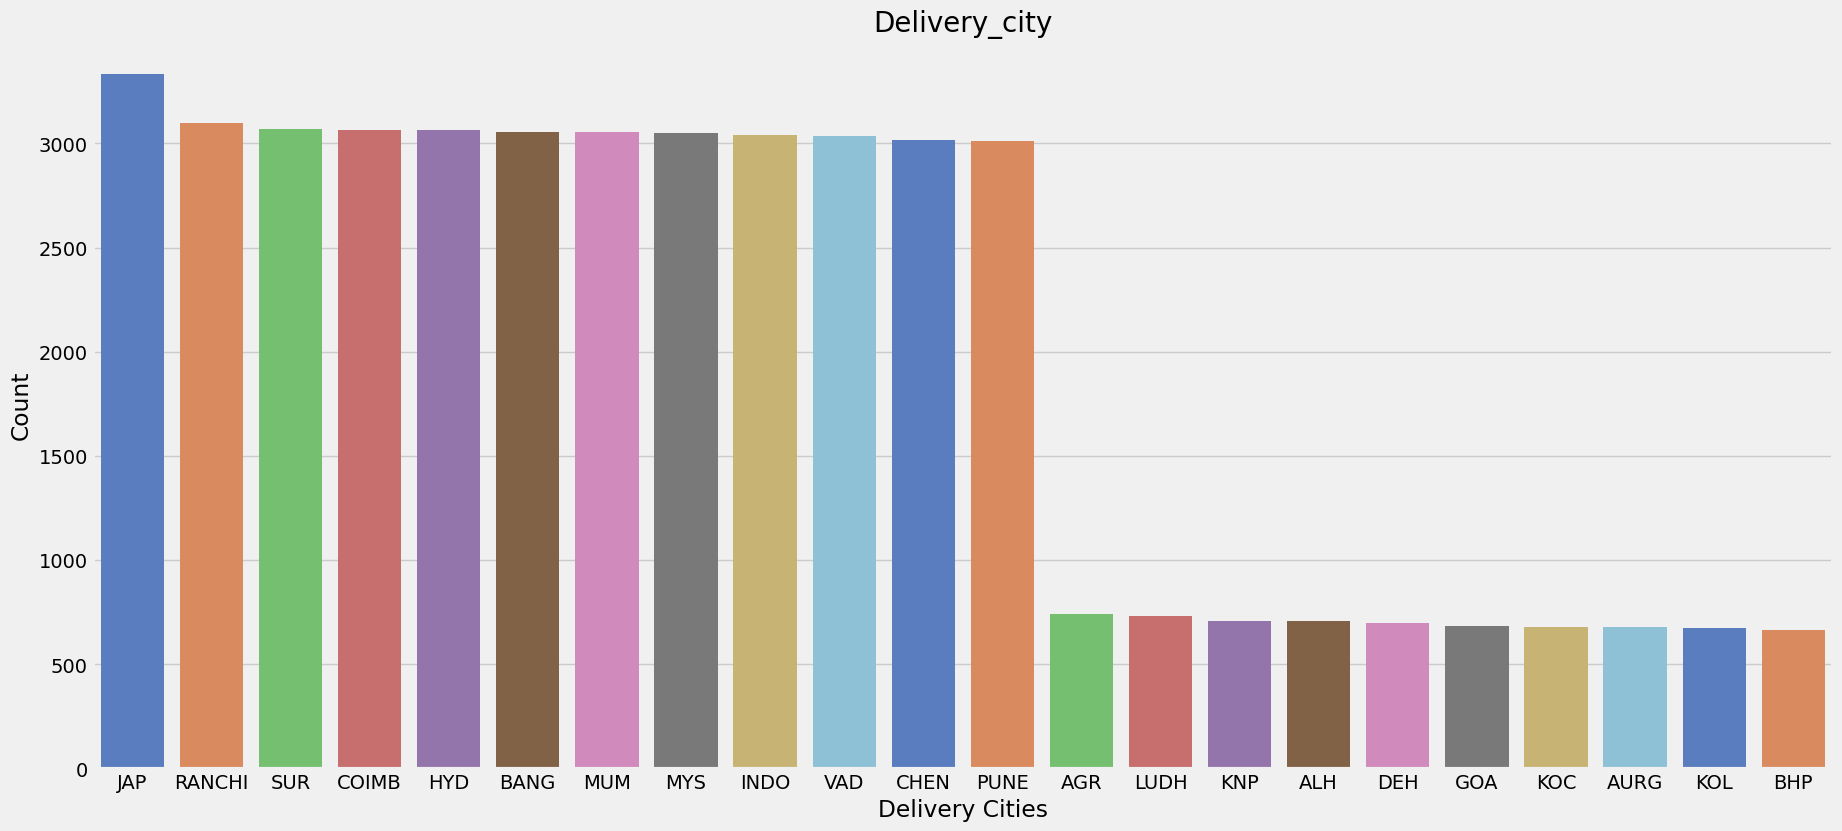

In [71]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

City_Counts = df['Delivery_city'].value_counts()
sns.barplot(x=City_Counts.index, y=City_Counts, palette='muted')

plt.title('Delivery_city', fontweight=30, fontsize=20)
plt.xlabel('Delivery Cities')
plt.ylabel('Count') 
plt.show()

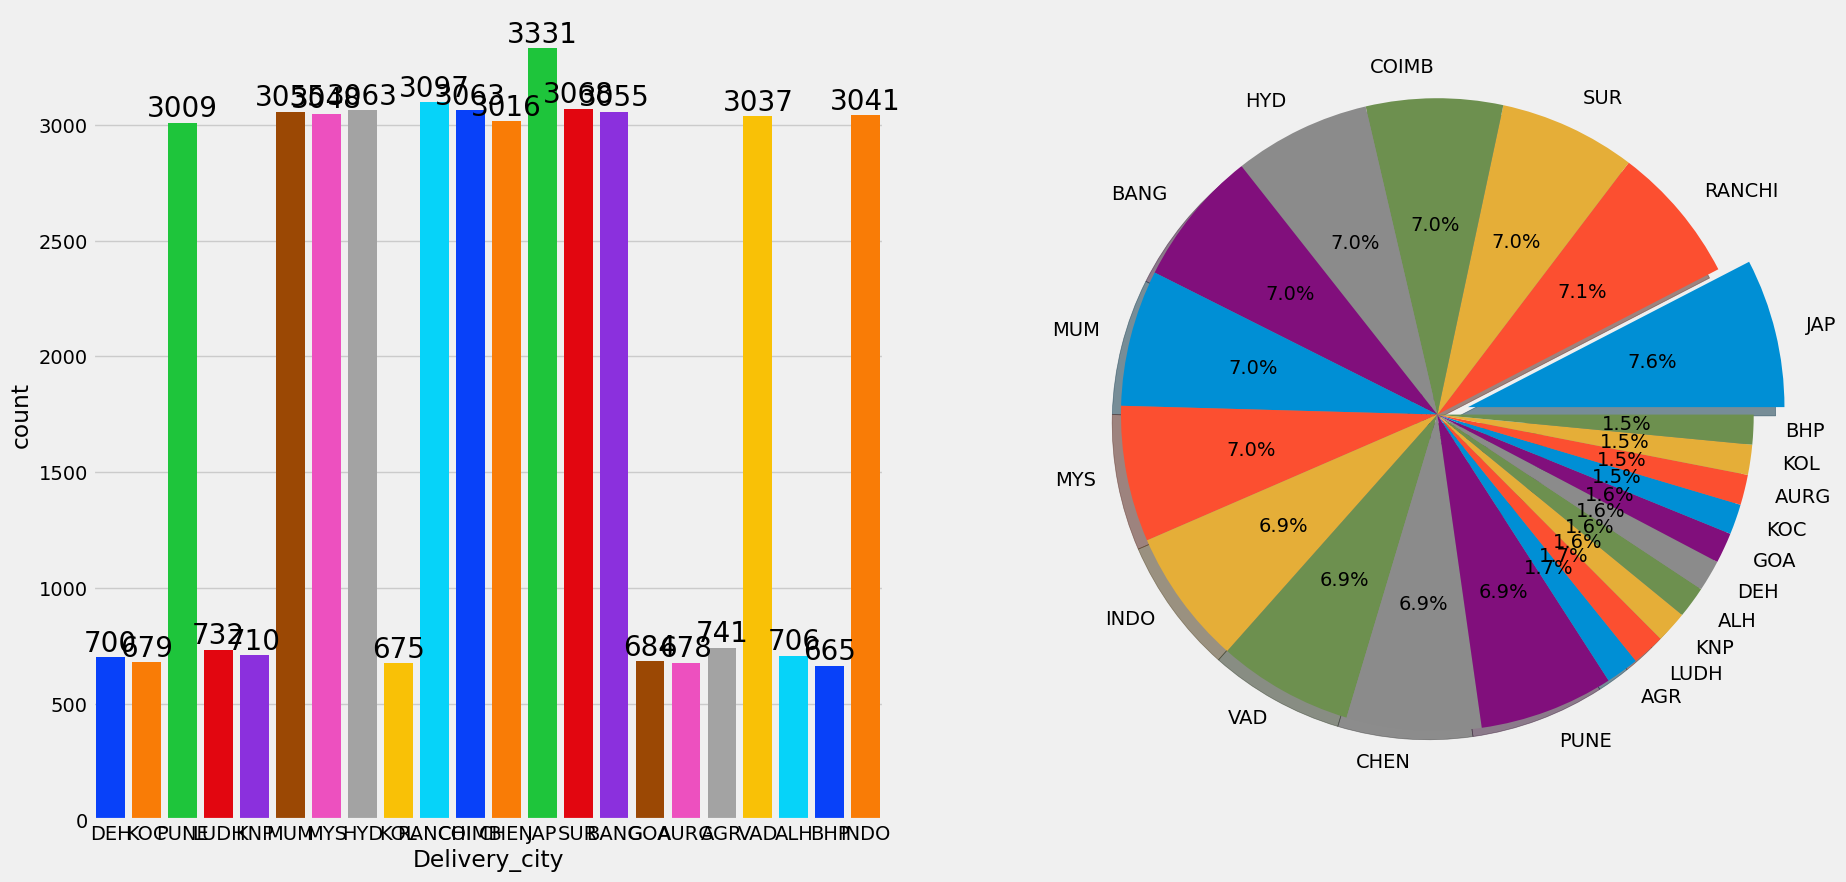

In [72]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Delivery_city', data=df, palette='bright', ax=ax[0], saturation=0.95)
plt.xticks(rotation='vertical')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Delivery_city'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observations

- Jaipur have ordered the food most no of time followed by ranchi

### Hours wise order

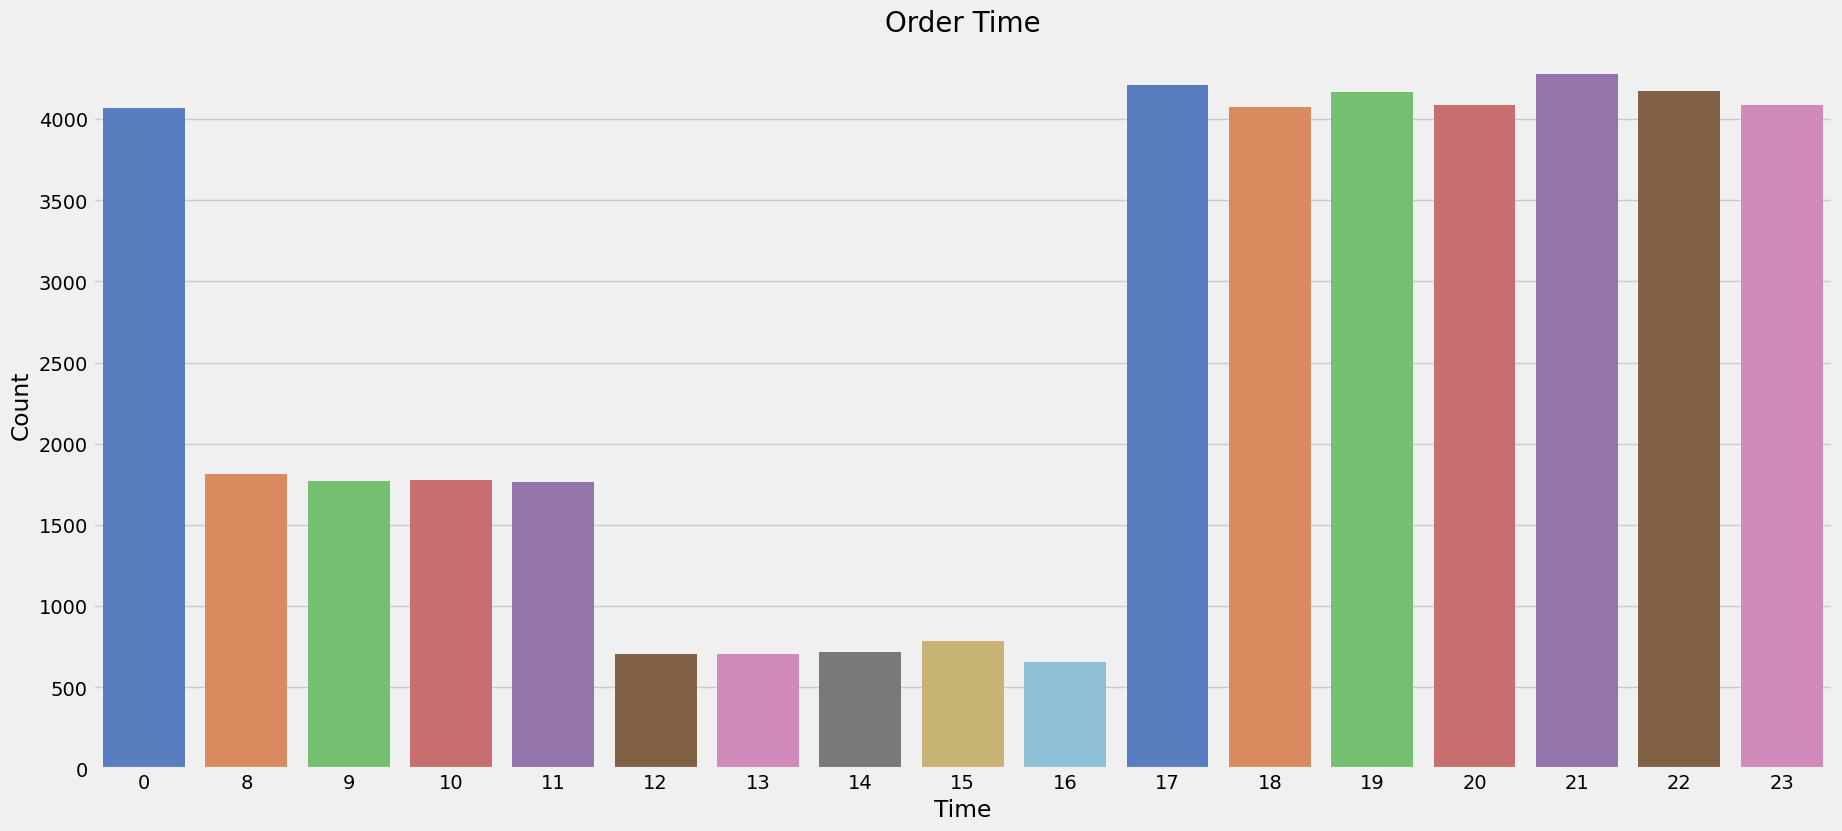

In [73]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

Time_Counts = df['Time_Orderd_Hour'].value_counts()
sns.barplot(x=Time_Counts.index, y=Time_Counts, palette='muted')

plt.title('Order Time', fontweight=30, fontsize=20)
plt.xlabel('Time')
plt.ylabel('Count') 
plt.show()

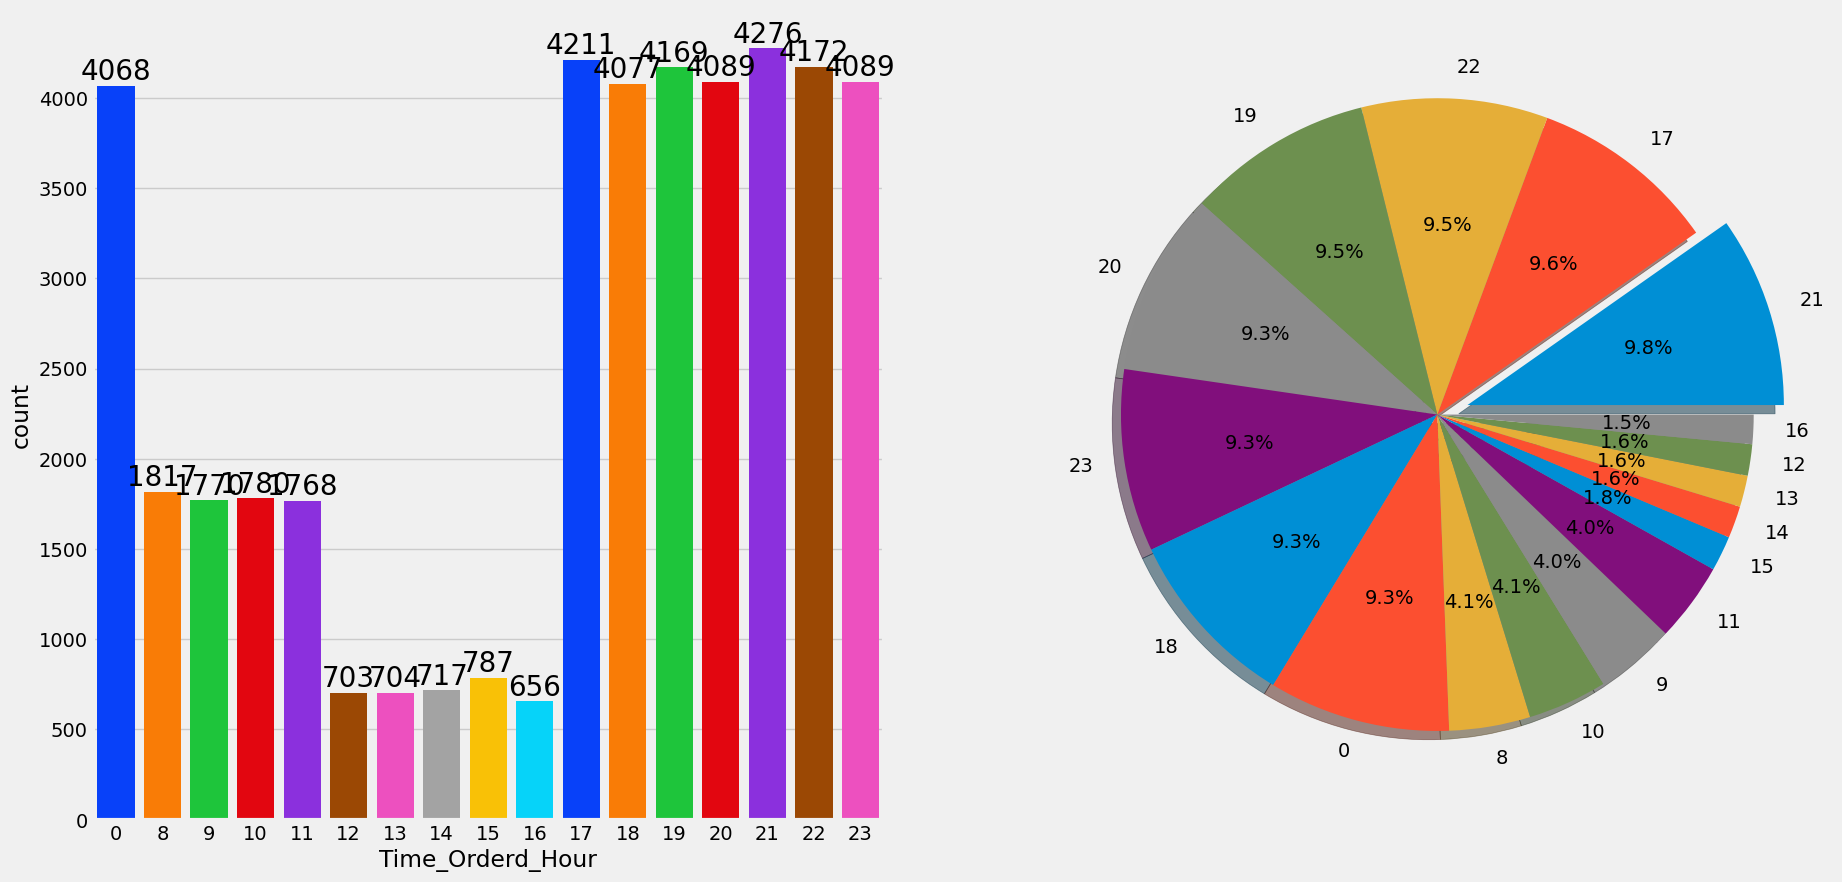

In [74]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot in the first subplot
sns.countplot(x='Time_Orderd_Hour', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart in the second subplot
festivals_counts = df['Time_Orderd_Hour'].value_counts()
explode = [0.1 if count == max(festivals_counts) else 0 for count in festivals_counts]
ax[1].pie(x=festivals_counts, labels=festivals_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

plt.show()


### Observation
- At 9pm people ordered the most for dinner
- the dataset do not contain data from 1am to 7am 

### Day graph

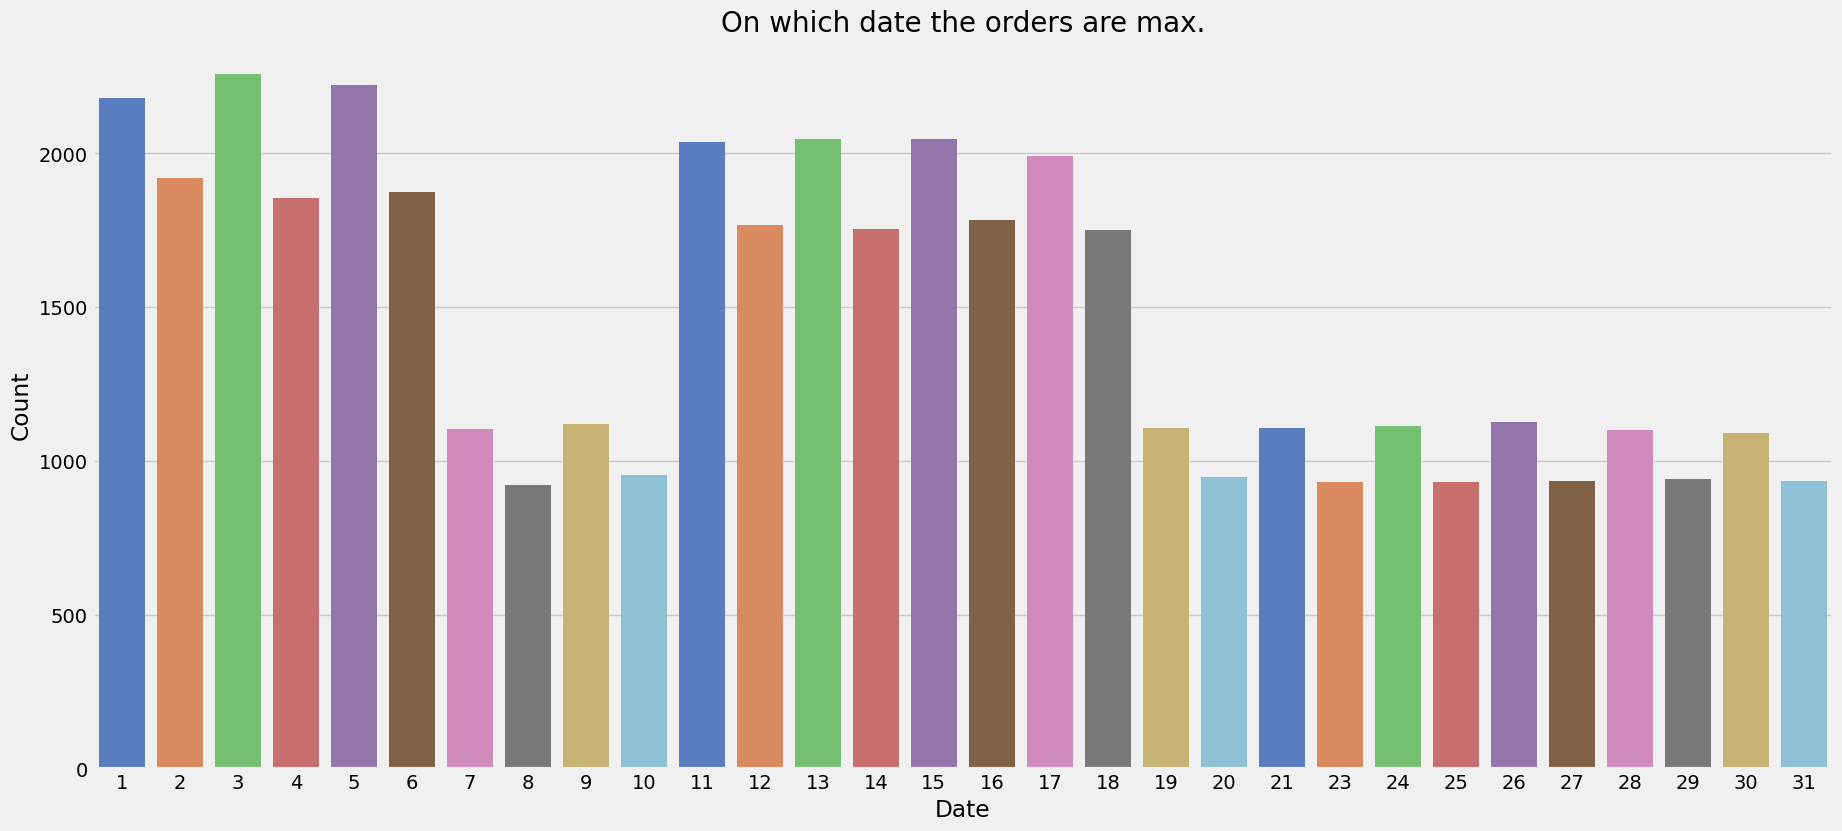

In [75]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

day_Counts = df['day'].value_counts()
sns.barplot(x=day_Counts.index, y=day_Counts, palette='muted')

plt.title('On which date the orders are max.', fontweight=30, fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count') 
plt.show()

### Observations

On 3rd day of the month, the orders are max

### Time taken (in mins) to deliver the food parcel

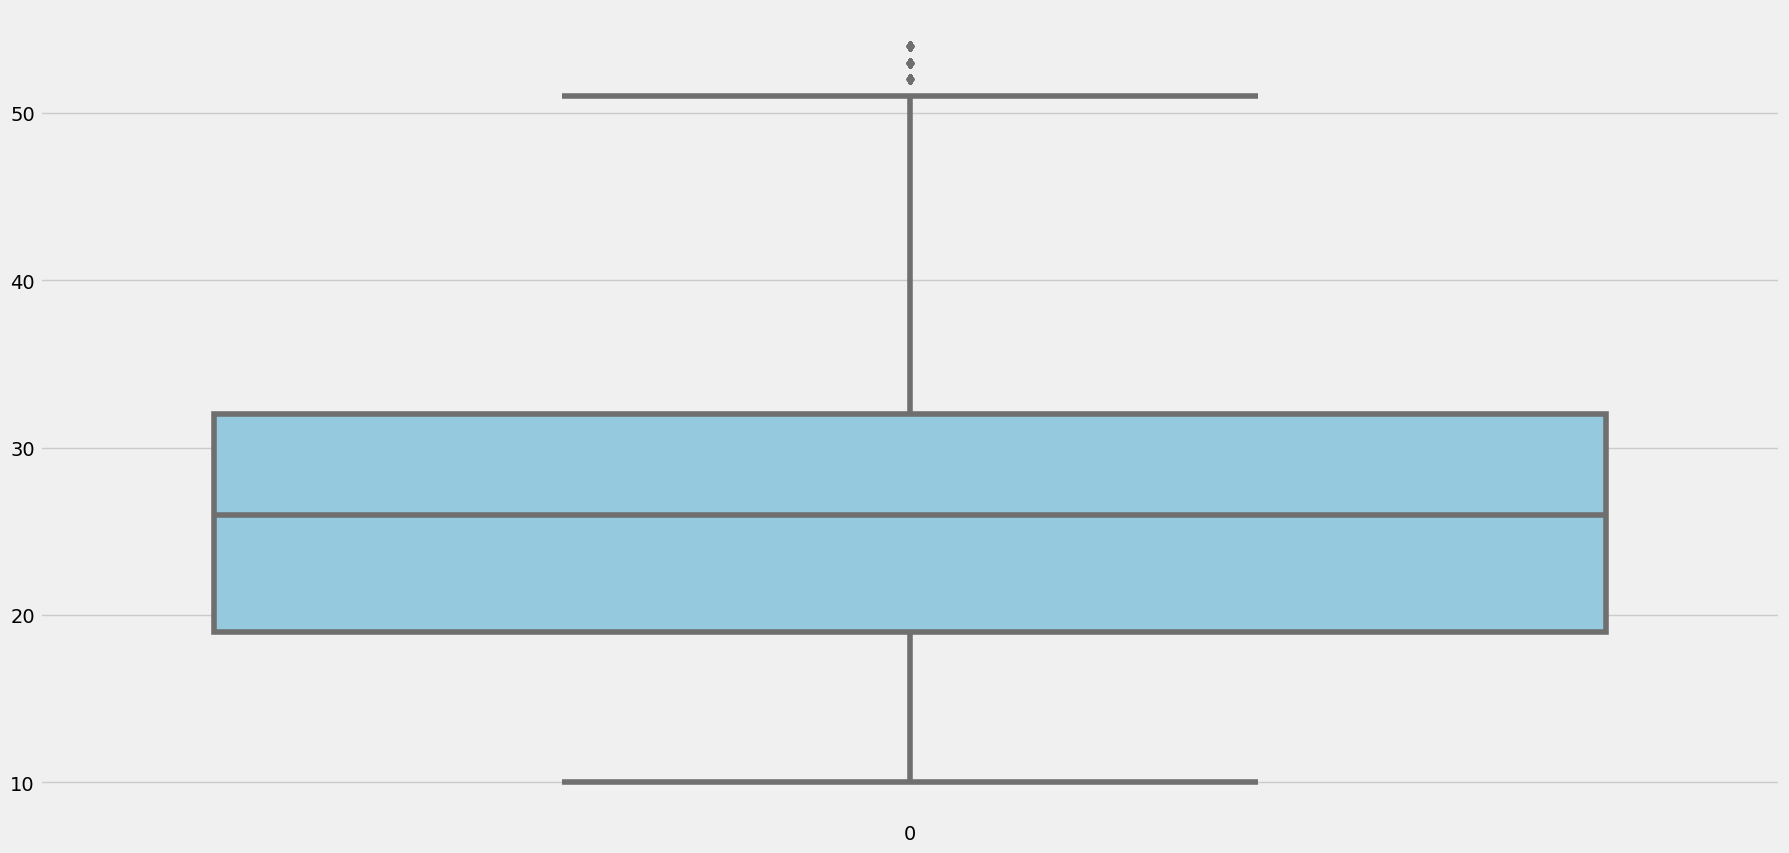

In [76]:
plt.subplots(figsize=(20,10))
sns.boxplot(df['Time_taken (min)'],color='skyblue')
plt.show()

### Observations
- In delivering food there are some outliers, this might be due to the following reasons: -
1. The delay in receiving the food from restaurant side 
2. breakdown of vehicle during delivering the food
3. the distance btw restaurant and delivery location is far away

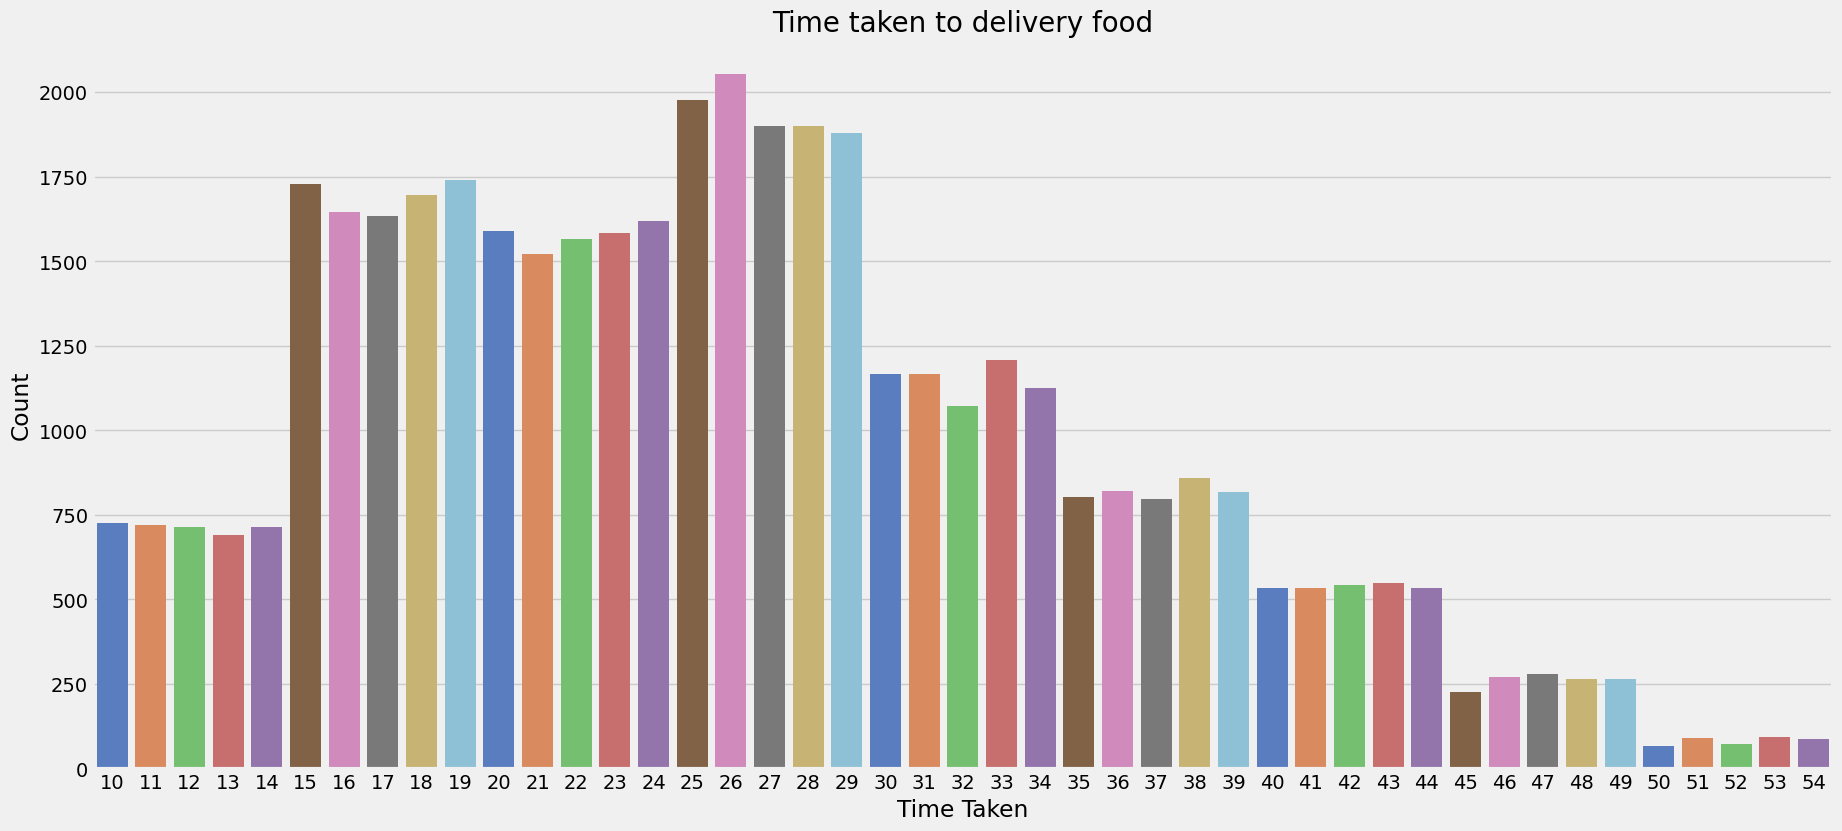

In [77]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fivethirtyeight')

day_Counts = df['Time_taken (min)'].value_counts()
sns.barplot(x=day_Counts.index, y=day_Counts, palette='muted')

plt.title('Time taken to delivery food', fontweight=30, fontsize=20)
plt.xlabel('Time Taken')
plt.ylabel('Count') 
plt.show()

### Observations

- Usually it takes 25-30 mins to order the food to the destination location

### comparing time taken feature(dependent feature) w.r.t other independent features

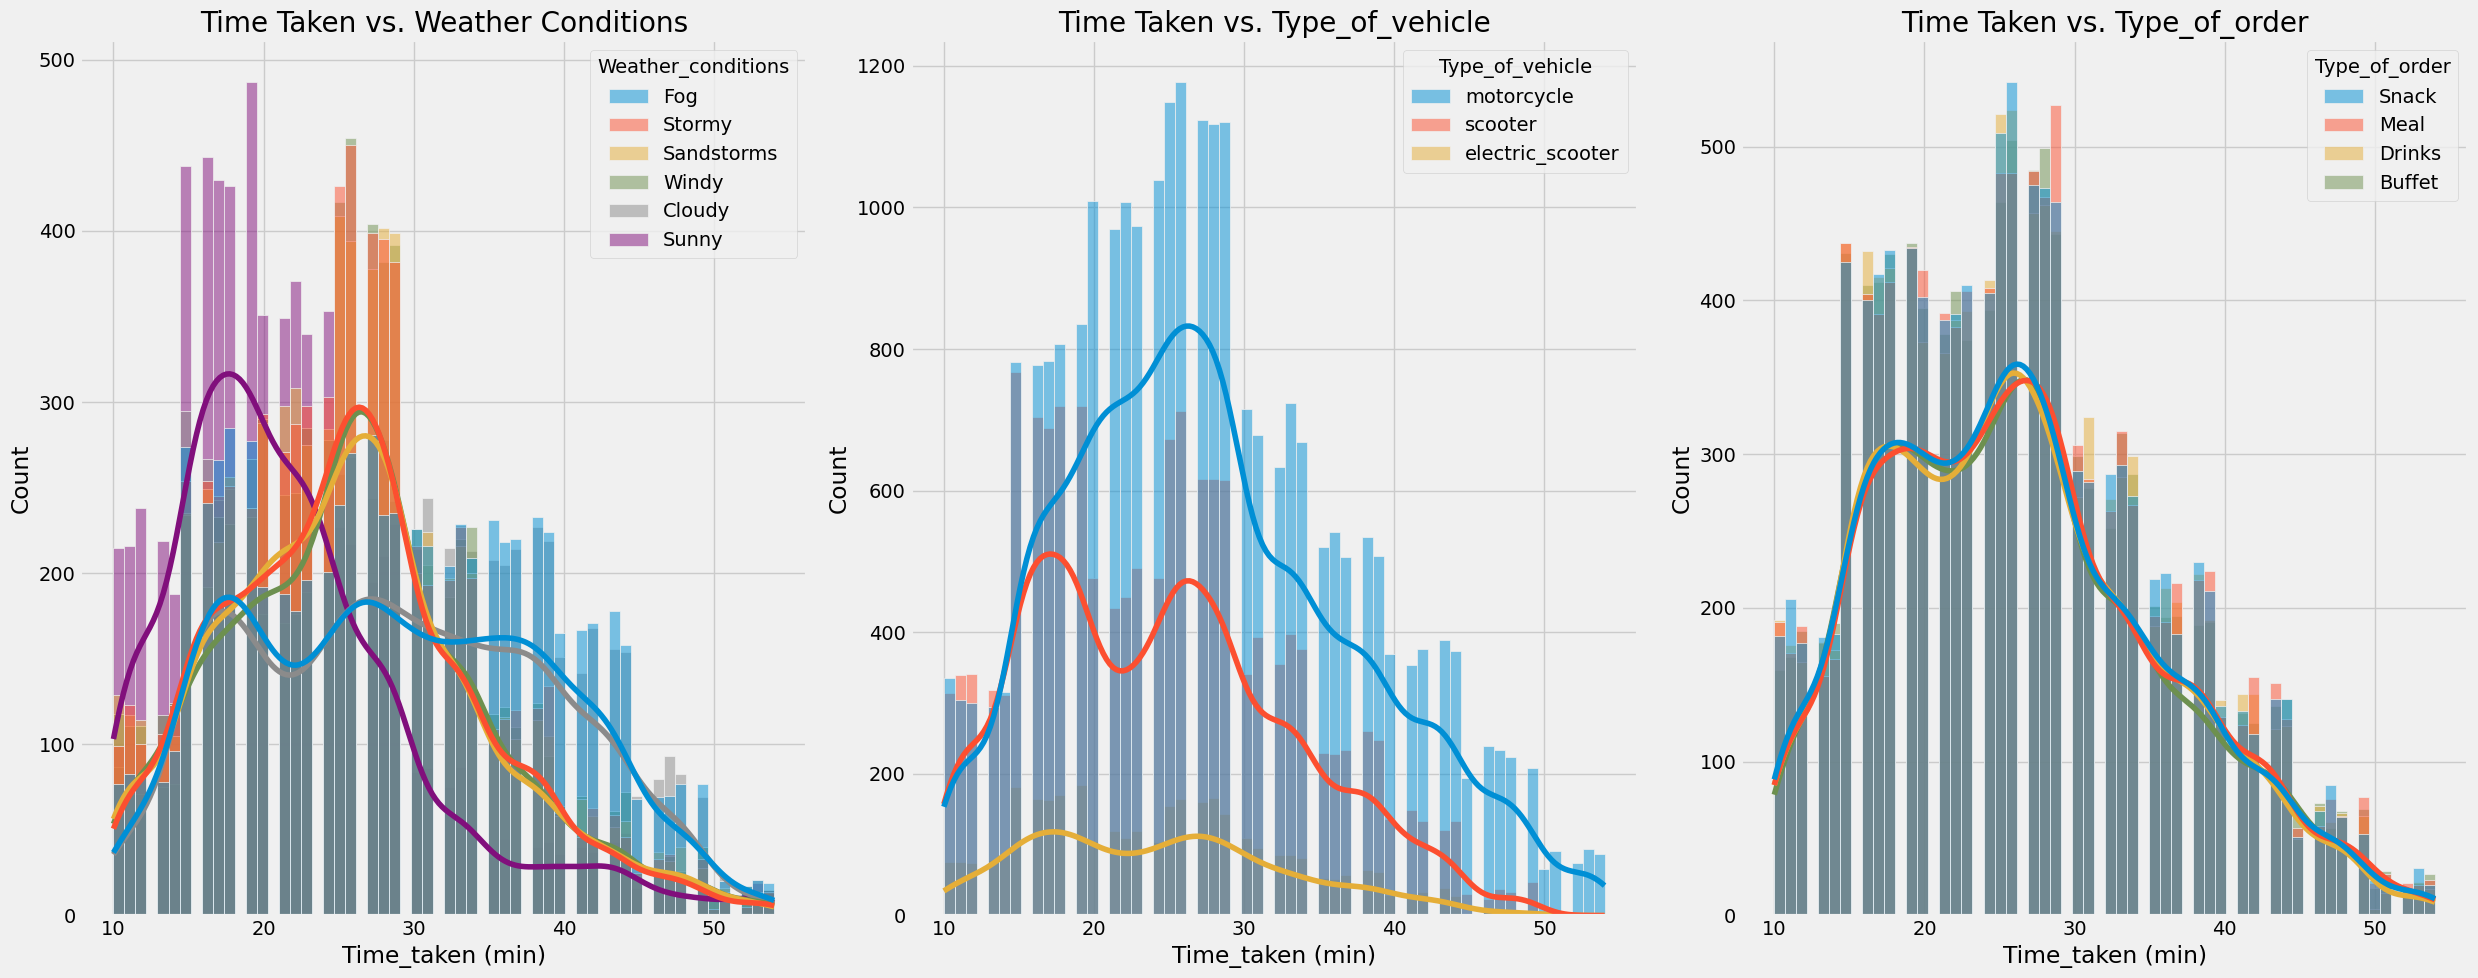

In [78]:
plt.figure(figsize=(25, 10))

# Subplot 1
plt.subplot(131)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Weather_conditions')
plt.title('Time Taken vs. Weather Conditions')

# Subplot 2
plt.subplot(132)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Type_of_vehicle')
plt.title('Time Taken vs. Type_of_vehicle')

# Subplot 3
plt.subplot(133)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Type_of_order')
plt.title('Time Taken vs. Type_of_order')

# Adjust the layout
plt.tight_layout()

plt.show()




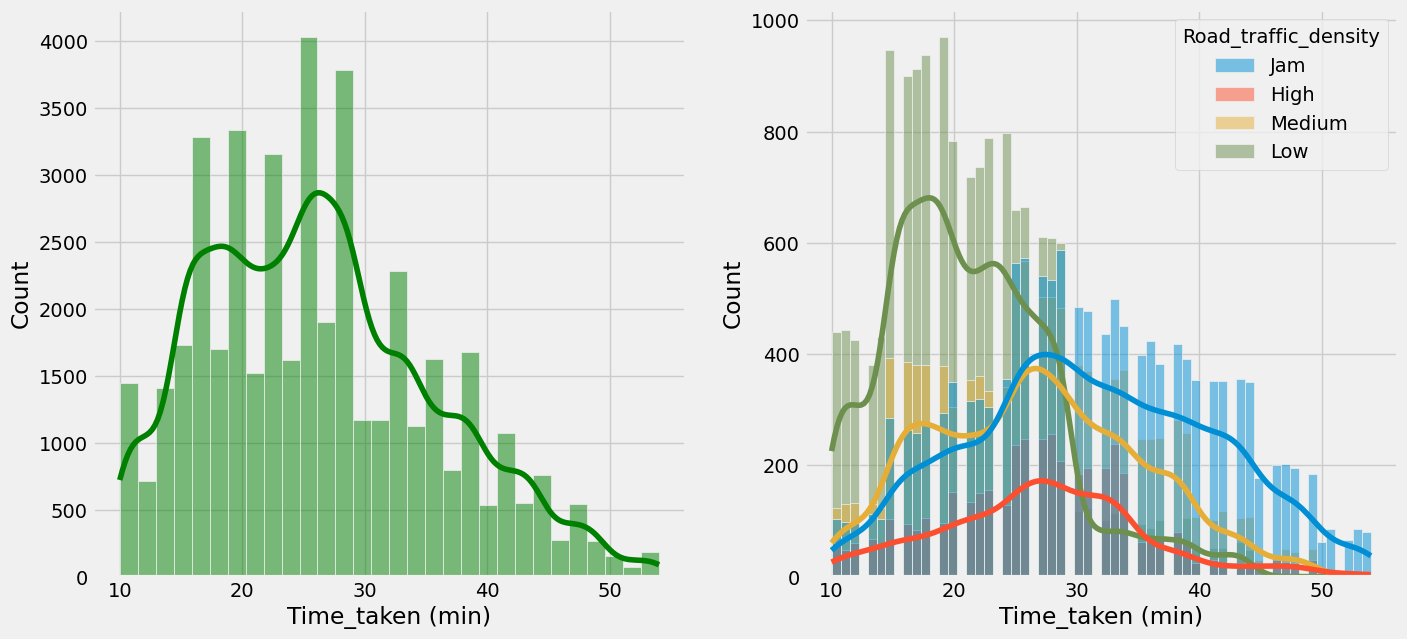

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Time_taken (min)',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Time_taken (min)',kde=True,hue='Road_traffic_density')
plt.show()

### Observation

- When there is low traffic then the food is deliver in less than 20 mins

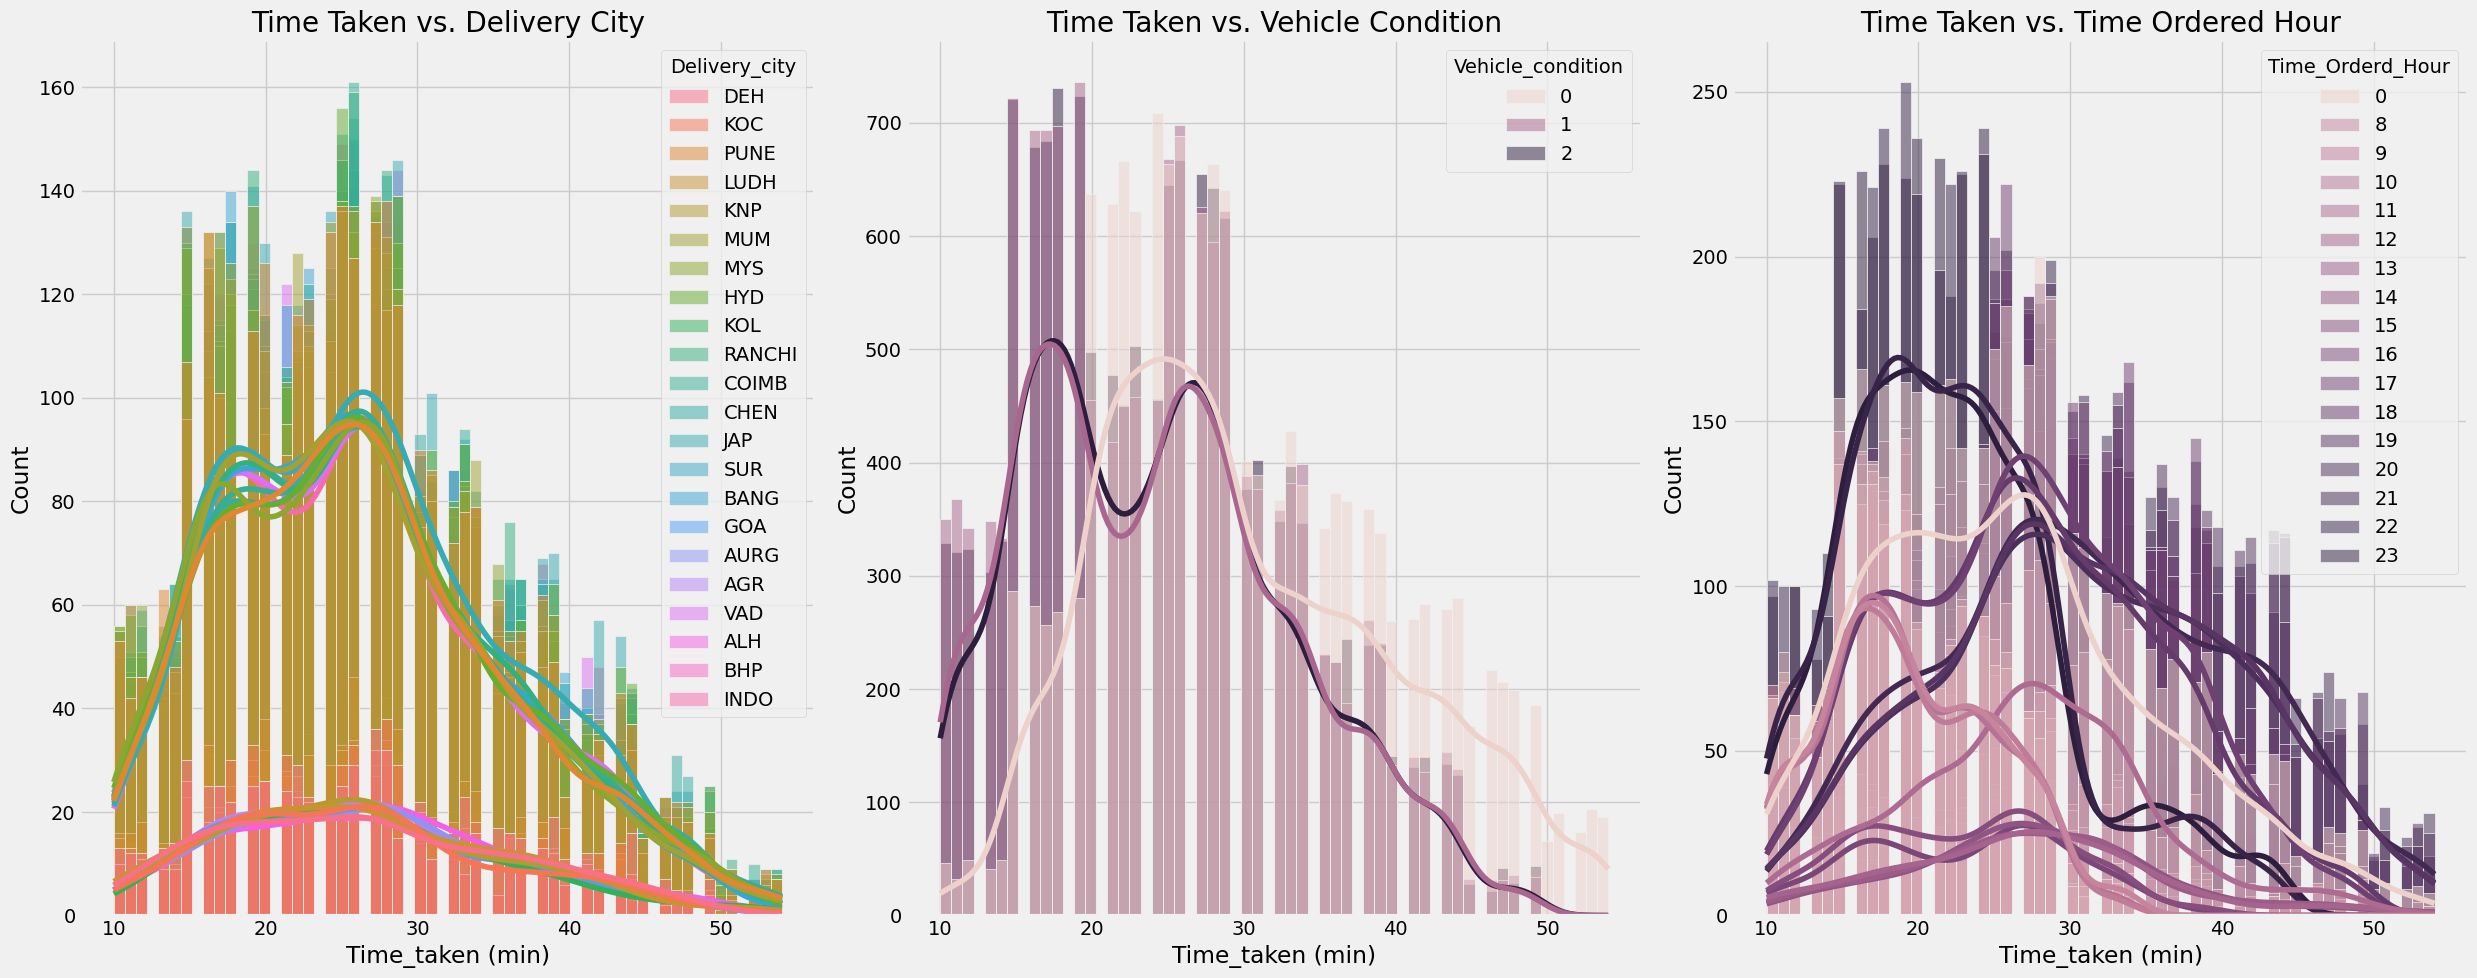

In [80]:
plt.figure(figsize=(25, 10))

# Subplot 1
plt.subplot(131)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Delivery_city')
plt.title('Time Taken vs. Delivery City')

# Subplot 2
plt.subplot(132)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Vehicle_condition')
plt.title('Time Taken vs. Vehicle Condition')

# Subplot 3
plt.subplot(133)
sns.histplot(data=df, x='Time_taken (min)', kde=True, hue='Time_Orderd_Hour')
plt.title('Time Taken vs. Time Ordered Hour')

# Adjust the layout
plt.tight_layout()

plt.show()

### comparing various feature w.r.t time taken(dependent feature)

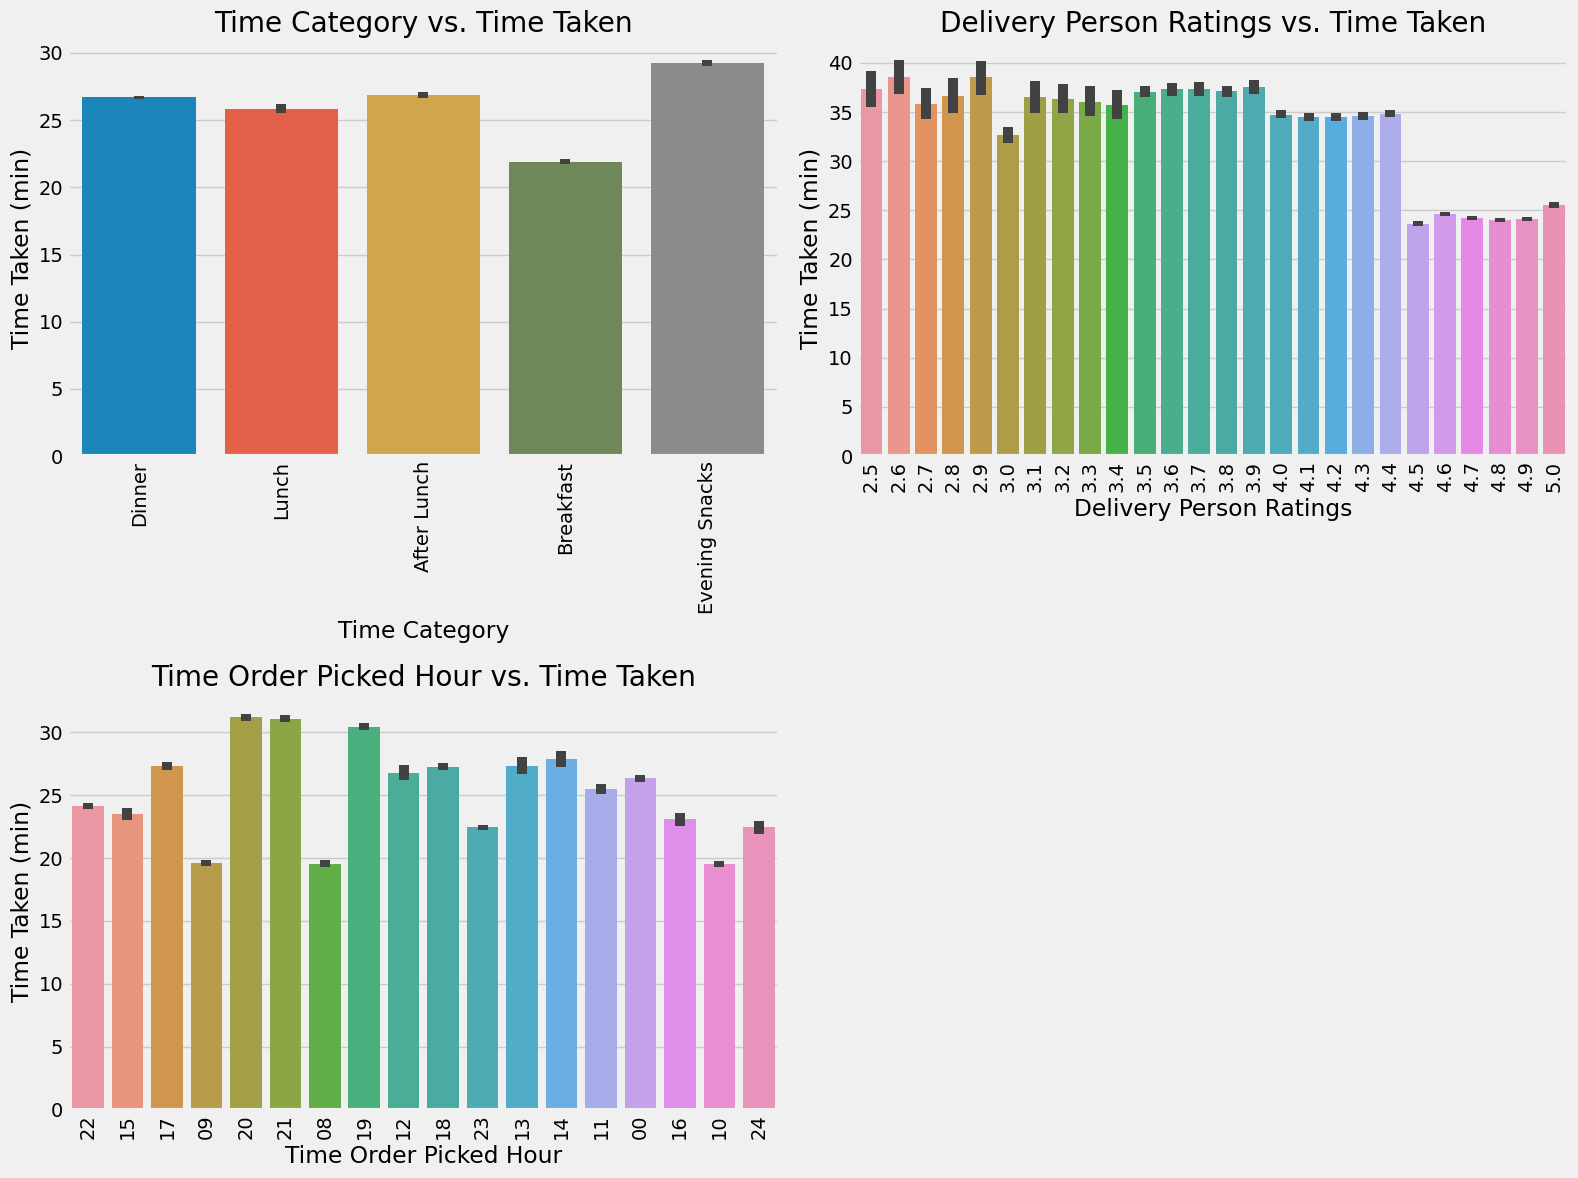

In [81]:
plt.figure(figsize=(16, 12))

# Subplot 1: Time_Category vs. Time_taken (min)
plt.subplot(2, 2, 1)
sns.barplot(x='Time_Category', y='Time_taken (min)', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Time Category')
plt.ylabel('Time Taken (min)')
plt.title('Time Category vs. Time Taken')

# Subplot 2: Delivery_person_Ratings vs. Time_taken (min)
plt.subplot(2, 2, 2)
sns.barplot(x='Delivery_person_Ratings', y='Time_taken (min)', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (min)')
plt.title('Delivery Person Ratings vs. Time Taken')

# Subplot 3: Time_Order_picked_Hour vs. Time_taken (min)
plt.subplot(2, 2, 3)
sns.barplot(x='Time_Order_picked_Hour', y='Time_taken (min)', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Time Order Picked Hour')
plt.ylabel('Time Taken (min)')
plt.title('Time Order Picked Hour vs. Time Taken')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Observation

- for evening snacks the deliver executives take a little long to deliver the food probably because of rush hours.
- The most common rating of among deliver executives is 2.9 star.
- 8pm and 9 o'clock is the time when the food is order maximum times
- deliver executive with low rating are taking longer time to deliver the food

In [82]:
df.to_csv('semi_cleaned_data.csv', index=False)